In [1]:
import pandas as pd

df2 = pd.read_excel('Eric Carle July 20.xlsx')
df2.columns = [                'ISBN',                'Title',
                     'Author',               'Format',
                      'Price',            'Publisher',
                    'Imprint',     'Publication Date',
                  'RTD Sales',             'TW Sales',
                      'Pages',        'BISAC Level 1',
              'BISAC Level 2',            'YTD Sales',
                   'LW Sales',  'First 4 Weeks Sales',
        'First 8 Weeks Sales', 'First 12 Weeks Sales',
       'First 52 Weeks Sales',                     '2023',
                           '2022',                     '2021',
                           '2020',         'YTD LY Sales',
                'TW LY Sales',            'YTD Dollars',
                 '2023 Dollars',           '2022 Dollars',
                 '2021 Dollars',           '2020 Dollars']
df2['RTD Dollars'] = df2['Price'] * df2['RTD Sales']
columns_to_drop = ['TW Sales', 'Pages', 'LW Sales','BISAC Level 2', 'First 4 Weeks Sales',
                   'First 8 Weeks Sales', 'First 12 Weeks Sales',
                   'First 52 Weeks Sales', 'Imprint', 'YTD LY Sales', 'TW LY Sales']

# Drop the specified columns
df2 = df2.drop(columns=columns_to_drop)

authors_to_keep = ['Carle Eric', 'Eric Carle', 'Carle E']

df3 = df2[df2['Author'].isin(authors_to_keep)]
df3.head()

,ISBN,Title,Author,Format,Price,Publisher,Publication Date,RTD Sales,BISAC Level 1,YTD Sales,2023,2022,2021,2020,YTD Dollars,2023 Dollars,2022 Dollars,2021 Dollars,2020 Dollars,RTD Dollars
0,9780399226908,The Very Hungry Caterpillar,Carle Eric,Board Books,10.99,Penguin Group Usa,1994-03-23,7767452,JUVENILE FICTION,285723,701497,738922,735644,622673,3140095.77,7709452.03,8120752.78,8084727.56,6843176.27,85364297.48
2,9781534424548,My First I See You: a Mirror Book,Eric Carle,Board Books,7.99,Simon & Schuster,2018-07-10,890183,JUVENILE FICTION,94004,204390,190476,167147,112785,751091.96,1633076.10,1521903.24,1335504.53,901152.15,7112562.17
3,9780694013012,From Head to Toe,Eric Carle,Board Books,9.99,Harpercollins Publishers,1999-03-27,761779,JUVENILE FICTION,9610,23300,28488,34047,29731,96003.90,232767.00,284595.12,340129.53,297012.69,7610172.21
4,9780399208539,The Very Hungry Caterpillar,Eric Carle,Hardcover,21.99,Penguin Group Usa,1981-10-15,688492,JUVENILE FICTION,37236,40430,32059,39463,36963,818819.64,889055.70,704977.41,867791.37,812816.37,15139939.08
5,9780448489322,Love from the Very Hungry Caterpillar,Eric Carle,Hardcover,9.99,Penguin Group Usa,2015-12-15,673518,JUVENILE FICTION,70626,80335,80455,78366,65912,705553.74,802546.65,803745.45,782876.34,658460.88,6728444.82


In [2]:
# df3.to_excel('Eric Carle.xlsx')

In [3]:
df3.shape

(556, 20)

In [4]:
df3.dtypes

ISBN                         int64
Title                       object
Author                      object
Format                      object
Price                      float64
Publisher                   object
Publication Date    datetime64[ns]
RTD Sales                    int64
BISAC Level 1               object
YTD Sales                    int64
2023                         int64
2022                         int64
2021                         int64
2020                         int64
YTD Dollars                float64
2023 Dollars               float64
2022 Dollars               float64
2021 Dollars               float64
2020 Dollars               float64
RTD Dollars                float64
dtype: object

In [5]:
import matplotlib.pyplot as plt
# Calculate total units and dollar sales for each year and YTD
units_sales = df3[['2020', '2021', '2022', '2023', 'YTD Sales']].sum()
dollar_sales = df3[['2020 Dollars', '2021 Dollars', '2022 Dollars', '2023 Dollars', 'YTD Dollars']].sum()

In [6]:
units_sales

2020         1847157
2021         2268534
2022         2312937
2023         2534298
YTD Sales    1527450
dtype: int64

In [7]:
dollar_sales

2020 Dollars    20886985.88
2021 Dollars    25204436.85
2022 Dollars    24770310.31
2023 Dollars    27008956.61
YTD Dollars     16266402.07
dtype: float64

In [ ]:
from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)

plt.figure(figsize=(10, 10))

# Dollar Sales as a bar plot
ax1 = plt.gca()
dollar_sales.plot(kind='bar', color='green', ax=ax1, alpha=0.6)
ax1.set_title('Total Units and Dollars by Year', fontweight='bold')
ax1.set_ylabel('Dollars', fontweight='bold')
ax1.yaxis.set_major_formatter(FuncFormatter(millions))
ax1.set_xlabel('Year', fontweight='bold')
ax1.set_xticks(range(len(dollar_sales.index)))
ax1.set_xticklabels(dollar_sales.index, rotation=0)

# Units Sales as a line plot on the same subplot
ax2 = ax1.twinx()
units_sales.plot(kind='line', color='red', marker='o', ax=ax2)
ax2.set_ylabel('Units', fontweight='bold')
ax2.yaxis.set_major_formatter(FuncFormatter(millions))

plt.tight_layout()
plt.show()

In [9]:
# title count/sales per title

In [218]:
avg_units_per_title = df3[['2020', '2021', '2022', '2023', 'YTD Sales']].mean()
avg_dollars_per_title = df3[['2020 Dollars', '2021 Dollars', '2022 Dollars', '2023 Dollars', 'YTD Dollars']].mean()
avg_dollars_per_title

2020 Dollars    37566.521367
2021 Dollars    45331.720953
2022 Dollars    44550.917824
2023 Dollars    48577.260090
YTD Dollars     29256.118831
dtype: float64

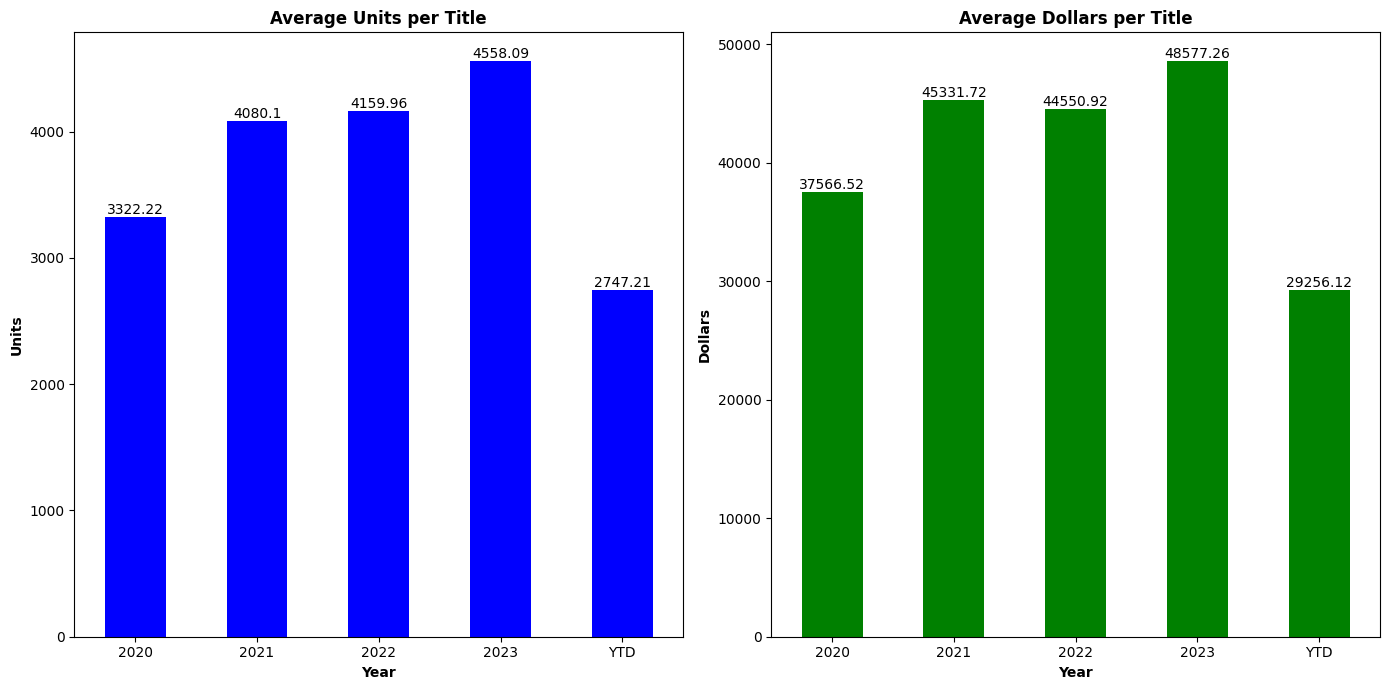

In [219]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

# Average Units per Title
avg_units_per_title.plot(kind='bar', color='blue', ax=axes[0])
axes[0].set_title('Average Units per Title', fontweight='bold')
axes[0].set_ylabel('Units', fontweight='bold')
axes[0].set_xlabel('Year', fontweight='bold')
axes[0].set_xticklabels(['2020', '2021', '2022', '2023', 'YTD'], fontsize=10)
axes[0].ticklabel_format(style='plain', axis='y')
axes[0].tick_params(axis='x', rotation=0)
for i in axes[0].containers:
    axes[0].bar_label(i, label_type='edge')

# Average Dollars per Title
avg_dollars_per_title.plot(kind='bar', color='green', ax=axes[1])
axes[1].set_title('Average Dollars per Title', fontweight='bold')
axes[1].set_ylabel('Dollars', fontweight='bold')
axes[1].set_xlabel('Year', fontweight='bold')
axes[1].set_xticklabels(['2020', '2021', '2022', '2023', 'YTD'], fontsize=10)
axes[1].ticklabel_format(style='plain', axis='y')
axes[1].tick_params(axis='x', rotation=0)
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.2f', label_type='edge')  # Rounded to the hundredth

plt.tight_layout()
plt.show()

In [12]:
# by format

In [99]:
format_sales = df3.groupby('Format').agg({
    '2020': 'sum',
    '2021': 'sum',
    '2022': 'sum',
    '2023': 'sum',
    'YTD Sales': 'sum',
    '2020 Dollars': 'sum',
    '2021 Dollars': 'sum',
    '2022 Dollars': 'sum',
    '2023 Dollars': 'sum',
    'YTD Dollars': 'sum',
    'Format': 'count'
}).rename(columns={'Format': 'Title Count'}).reset_index()

In [100]:
format_sales

,Format,2020,2021,2022,2023,YTD Sales,2020 Dollars,2021 Dollars,2022 Dollars,2023 Dollars,YTD Dollars,Title Count
0,Board Books,1325344,1635434,1764469,1929059,1052280,14186542.64,17170349.71,18207168.06,19573864.23,10604353.79,144
1,Boxed Set,30485,36113,17908,16173,9502,639304.15,759987.87,381118.92,343999.27,204485.98,6
2,Hardcover,379451,453116,405958,456297,391949,4897474.34,5818314.10,5052113.78,5854836.30,4758237.43,237
3,Mass Market Paperback,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,5
4,Other,1718,1208,924,2908,2010,16095.53,11554.74,12787.26,47177.54,33370.51,16
5,Trade Paperback,110159,142663,123678,129861,71709,1147569.22,1444230.43,1117122.29,1189079.27,665954.36,148


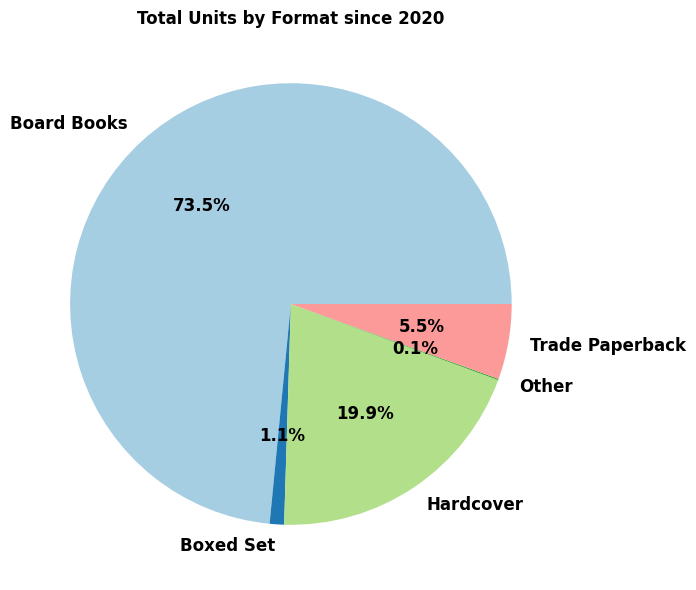

In [214]:
format_sales_filtered = format_sales[format_sales['Format'] != 'Mass Market Paperback']

# Sum total units and dollars by format
format_units = format_sales_filtered[['2020', '2021', '2022', '2023', 'YTD Sales']].sum(axis=1)
format_dollars = format_sales_filtered[['2020 Dollars', '2021 Dollars', '2022 Dollars', '2023 Dollars', 'YTD Dollars']].sum(axis=1)

# Function to bold the labels
def bold_labels(label, count):
    return f'{label} ({count} titles)'

fig, ax = plt.subplots(figsize=(10, 6))

# Pie chart for total units by format
ax.pie(format_units, labels=format_sales_filtered['Format'], autopct='%1.1f%%',colors=plt.cm.Paired.colors, textprops={'weight': 'bold', 'fontsize': 12})

ax.set_title('Total Units by Format since 2020', fontweight='bold', pad=-100)

plt.tight_layout()
plt.show()

In [16]:
format_sales_filtered

,Format,2020,2021,2022,2023,YTD Sales,2020 Dollars,2021 Dollars,2022 Dollars,2023 Dollars,YTD Dollars
0,Board Books,1325344,1635434,1764469,1929059,1052280,14186542.64,17170349.71,18207168.06,19573864.23,10604353.79
1,Boxed Set,30485,36113,17908,16173,9502,639304.15,759987.87,381118.92,343999.27,204485.98
2,Hardcover,379451,453116,405958,456297,391949,4897474.34,5818314.10,5052113.78,5854836.30,4758237.43
4,Other,1718,1208,924,2908,2010,16095.53,11554.74,12787.26,47177.54,33370.51
5,Trade Paperback,110159,142663,123678,129861,71709,1147569.22,1444230.43,1117122.29,1189079.27,665954.36


In [110]:
# import numpy as np
# units_sales_df = format_sales_filtered[['Format','2020', '2021', '2022', '2023', 'YTD Sales']]
# dollars_sales_df = format_sales_filtered[['Format','2020 Dollars', '2021 Dollars', '2022 Dollars', '2023 Dollars', 'YTD Dollars']]


# def format_label(value):
#     if value >= 1e6:
#         return f'{value / 1e6:.1f}M'
#     elif value >= 1e3:
#         return f'{value / 1e3:.0f}K'
#     else:
#         return f'{value:.0f}'

# # Plotting units data
# plt.figure(figsize=(14, 8))
# ax = units_sales_df.set_index('Format').T.plot(kind='bar', figsize=(14, 8), width=0.8)

# # Adding formatted values to bars
# for container in ax.containers:
#     labels = [format_label(v) for v in container.datavalues]
#     ax.bar_label(container, labels=labels, label_type='edge', fontsize=10)

# plt.title('Total Units by Format')
# plt.xlabel('Year')
# plt.ylabel('Units Sold')
# plt.ticklabel_format(style='plain', axis='y')  # Disable scientific notation
# plt.xticks(rotation=0, fontsize=10, fontweight='bold')  # No rotation and bold for x labels
# plt.legend(title='Format', loc='upper right')
# plt.grid(axis='y', linestyle='--', alpha=0.7)  # Remove solid lines for y axis
# ax.yaxis.grid(False)  # No grid lines for y axis

# # Adjusting y-ticks for better readability
# y_ticks = ax.get_yticks()
# ax.set_yticklabels([format_label(y) for y in y_ticks])

# plt.show()

# # Plotting dollars data
# plt.figure(figsize=(14, 8))
# ax = dollars_sales_df.set_index('Format').T.plot(kind='bar', figsize=(14, 8), width=0.8)

# # Adding formatted values to bars
# for container in ax.containers:
#     labels = [format_label(v) for v in container.datavalues]
#     ax.bar_label(container, labels=labels, label_type='edge', fontsize=10)

# plt.title('Total Dollars by Format')
# plt.xlabel('Year')
# plt.ylabel('Sales Dollars')
# plt.ticklabel_format(style='plain', axis='y')  # Disable scientific notation
# plt.xticks(rotation=0, fontsize=10, fontweight='bold')  # No rotation and bold for x labels
# plt.legend(title='Format', loc='upper right')
# plt.grid(axis='y', linestyle='--', alpha=0.7)  # Remove solid lines for y axis
# ax.yaxis.grid(False)  # No grid lines for y axis

# # Adjusting y-ticks for better readability
# y_ticks = ax.get_yticks()
# ax.set_yticklabels([format_label(y) for y in y_ticks])
# plt.show()

/var/tmp/ipykernel_3356303/3802235200.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([format_label(y) for y in y_ticks], fontsize=10, fontweight='bold')
/var/tmp/ipykernel_3356303/3802235200.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([format_label(y) for y in y_ticks], fontsize=10, fontweight='bold')


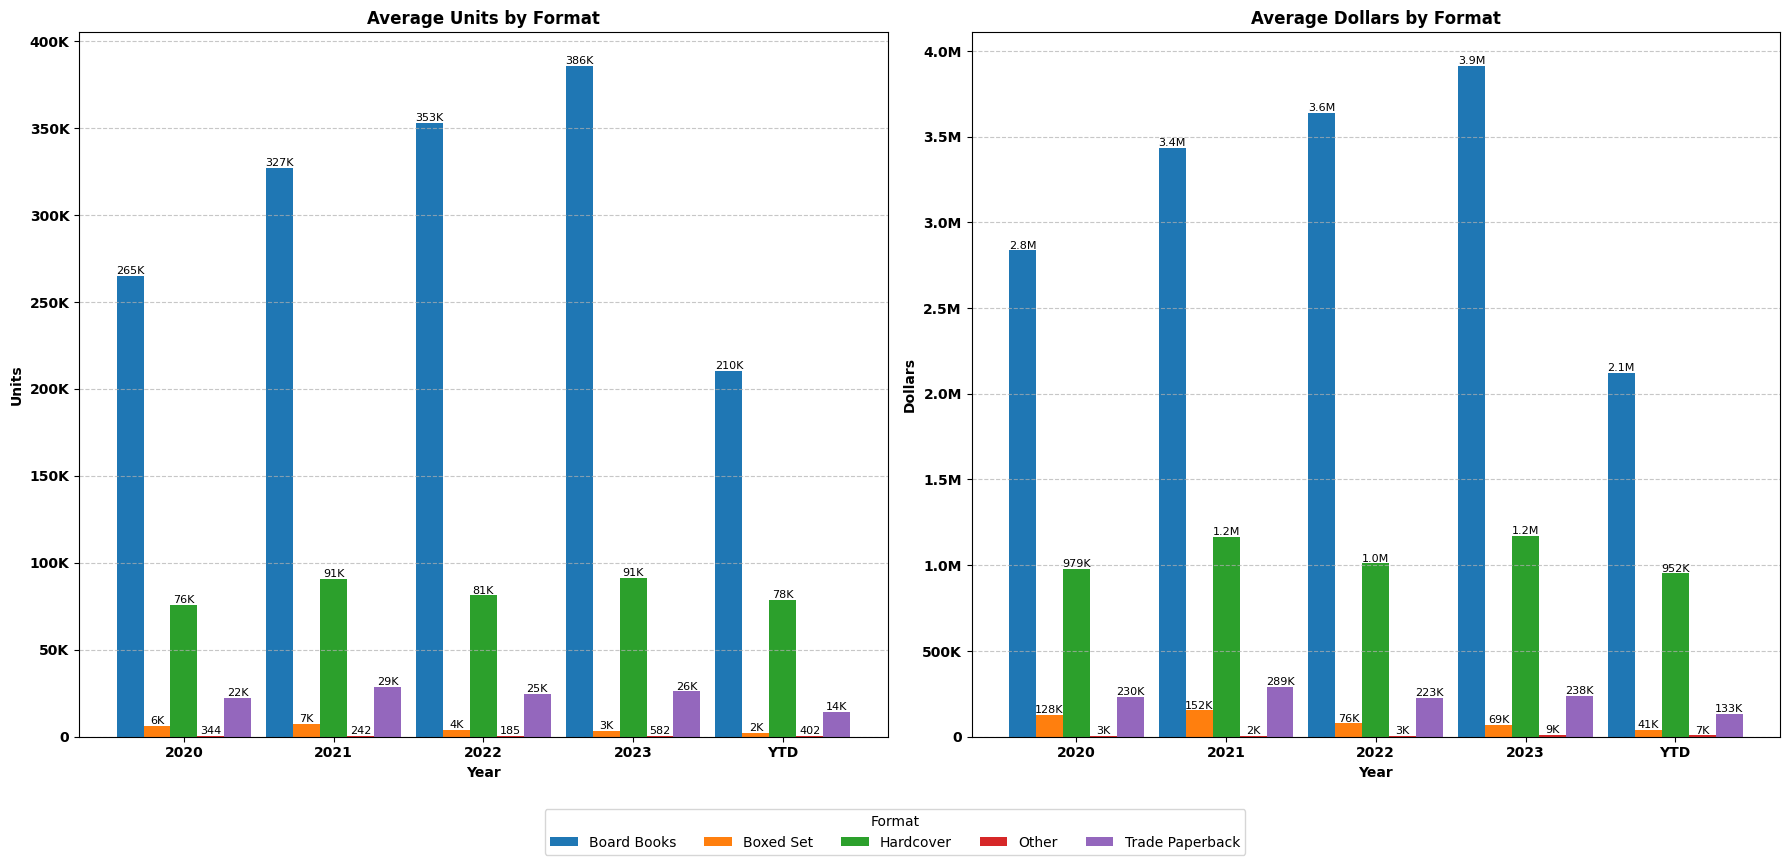

In [224]:
# Create a copy of the filtered sales data
format_sales_copy = format_sales_filtered.copy()

# Calculate average sales and average sales dollars per year for each format
format_sales_copy['Average Sales 2020'] = format_sales_copy['2020'] / format_sales_copy.shape[0]
format_sales_copy['Average Sales 2021'] = format_sales_copy['2021'] / format_sales_copy.shape[0]
format_sales_copy['Average Sales 2022'] = format_sales_copy['2022'] / format_sales_copy.shape[0]
format_sales_copy['Average Sales 2023'] = format_sales_copy['2023'] / format_sales_copy.shape[0]
format_sales_copy['Average YTD Sales'] = format_sales_copy['YTD Sales'] / format_sales_copy.shape[0]

format_sales_copy['Average Dollars 2020'] = format_sales_copy['2020 Dollars'] / format_sales_copy.shape[0]
format_sales_copy['Average Dollars 2021'] = format_sales_copy['2021 Dollars'] / format_sales_copy.shape[0]
format_sales_copy['Average Dollars 2022'] = format_sales_copy['2022 Dollars'] / format_sales_copy.shape[0]
format_sales_copy['Average Dollars 2023'] = format_sales_copy['2023 Dollars'] / format_sales_copy.shape[0]
format_sales_copy['Average YTD Dollars'] = format_sales_copy['YTD Dollars'] / format_sales_copy.shape[0]

def format_label(value):
    if value >= 1e6:
        return f'{value / 1e6:.1f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.0f}K'
    else:
        return f'{value:.0f}'

def format_yticks(ax):
    y_ticks = ax.get_yticks()
    ax.set_yticklabels([format_label(y) for y in y_ticks], fontsize=10, fontweight='bold')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Format legend labels with count
legend_labels = [f"{format}" for format in format_sales_copy['Format']]

# Plotting average units data with years as x-axis and bars as format type
bars_units = format_sales_copy[['Average Sales 2020', 'Average Sales 2021', 'Average Sales 2022', 'Average Sales 2023', 'Average YTD Sales']].T.plot(kind='bar', ax=axes[0], width=0.9)

axes[0].set_title('Average Units by Format', fontweight='bold')
axes[0].set_xlabel('Year', fontweight='bold')
axes[0].set_ylabel('Units', fontweight='bold')
axes[0].ticklabel_format(style='plain', axis='y')  # Disable scientific notation
axes[0].set_xticks(ticks=[0, 1, 2, 3, 4])
axes[0].set_xticklabels(labels=['2020', '2021', '2022', '2023', 'YTD'], rotation=0, fontsize=10, fontweight='bold')  # Correct x labels
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].get_legend().remove()  # Remove individual legend

format_yticks(axes[0])  # Format Y-axis tick labels

# Adding formatted values to bars
for container in bars_units.containers:
    labels = [format_label(v) for v in container.datavalues]
    axes[0].bar_label(container, labels=labels, label_type='edge', fontsize=8)

# Plotting average sales dollars data with years as x-axis and bars as format type
bars_dollars = format_sales_copy[['Average Dollars 2020', 'Average Dollars 2021', 'Average Dollars 2022', 'Average Dollars 2023', 'Average YTD Dollars']].T.plot(kind='bar', ax=axes[1], width=0.9)

axes[1].set_title('Average Dollars by Format', fontweight='bold')
axes[1].set_xlabel('Year', fontweight='bold')
axes[1].set_ylabel('Dollars', fontweight='bold')
axes[1].ticklabel_format(style='plain', axis='y')  # Disable scientific notation
axes[1].set_xticks(ticks=[0, 1, 2, 3, 4])
axes[1].set_xticklabels(labels=['2020', '2021', '2022', '2023', 'YTD'], rotation=0, fontsize=10, fontweight='bold')  # Correct x labels
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].get_legend().remove()  # Remove individual legend

format_yticks(axes[1])  # Format Y-axis tick labels

# Adding formatted values to bars
for container in bars_dollars.containers:
    labels = [format_label(v) for v in container.datavalues]
    axes[1].bar_label(container, labels=labels, label_type='edge', fontsize=8)

# Create a single legend below the x-axis
handles, _ = axes[0].get_legend_handles_labels()
fig.legend(handles, legend_labels, loc='upper center', ncol=len(legend_labels), title='Format', bbox_to_anchor=(0.5, -0.009))

plt.tight_layout()
plt.show()

In [19]:
# maybe add title count

In [20]:
df3['Character'] = df3['Title'].apply(lambda x: 'The Very Hungry Caterpillar' if 'Caterpillar' in x else 'Other Characters')
character_sales_cat = df3.groupby('Character').agg({
    'ISBN': 'count',  # Count the number of titles
    '2020': 'sum',
    '2021': 'sum',
    '2022': 'sum',
    '2023': 'sum',
    'YTD Sales': 'sum',
    '2020 Dollars': 'sum',
    '2021 Dollars': 'sum',
    '2022 Dollars': 'sum',
    '2023 Dollars': 'sum',
    'YTD Dollars': 'sum'
}).reset_index()

character_sales_cat

/var/tmp/ipykernel_3356303/2721341960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Character'] = df3['Title'].apply(lambda x: 'The Very Hungry Caterpillar' if 'Caterpillar' in x else 'Other Characters')


,Character,ISBN,2020,2021,2022,2023,YTD Sales,2020 Dollars,2021 Dollars,2022 Dollars,2023 Dollars,YTD Dollars
0,Other Characters,431,696607,868982,794739,917053,589389,7704101.85,9300222.47,8191867.70,9239252.46,5921486.43
1,The Very Hungry Caterpillar,125,1150550,1399552,1518198,1617245,938061,13182884.03,15904214.38,16578442.61,17769704.15,10344915.64


In [21]:
# Sum the total units since 2020 for each character
character_sales_cat['Total Units'] = character_sales_cat[['2020', '2021', '2022', '2023', 'YTD Sales']].sum(axis=1)
character_sales_cat['Total Dollars'] = character_sales_cat[['2020 Dollars', '2021 Dollars', '2022 Dollars', '2023 Dollars', 'YTD Dollars']].sum(axis=1)

In [22]:
character_sales_cat

,Character,ISBN,2020,2021,2022,2023,YTD Sales,2020 Dollars,2021 Dollars,2022 Dollars,2023 Dollars,YTD Dollars,Total Units,Total Dollars
0,Other Characters,431,696607,868982,794739,917053,589389,7704101.85,9300222.47,8191867.70,9239252.46,5921486.43,3866770,40356930.91
1,The Very Hungry Caterpillar,125,1150550,1399552,1518198,1617245,938061,13182884.03,15904214.38,16578442.61,17769704.15,10344915.64,6623606,73780160.81


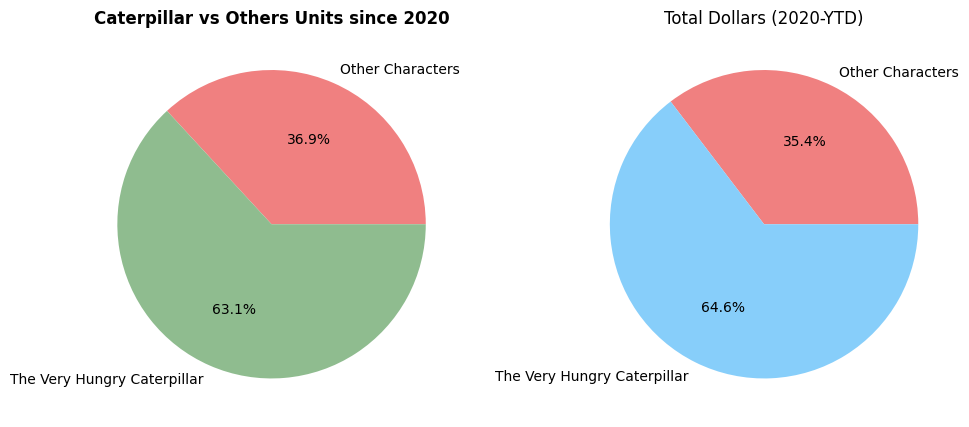

In [201]:
plt.figure(figsize=(10, 6))

# Pie chart for total units sold by character
plt.subplot(1, 2, 1)
plt.pie(character_sales_cat['Total Units'], labels=character_sales_cat['Character'], autopct='%1.1f%%', colors=['lightcoral', 'darkseagreen'])
plt.title('Caterpillar vs Others Units since 2020', fontweight = 'bold')

# Pie chart for total dollars sold by character
plt.subplot(1, 2, 2)
plt.pie(character_sales_cat['Total Dollars'], labels=character_sales_cat['Character'], autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Total Dollars (2020-YTD)')

plt.tight_layout()
plt.show()

In [24]:
def categorize_character(title):
    if 'Caterpillar' in title:
        return 'The Very Hungry Caterpillar'
    elif 'Ladybug' in title:
        return 'The Grouchy Ladybug'
    elif 'Spider' in title:
        return 'The Very Busy Spider'
    elif 'Chameleon' in title:
        return 'The Mixed-Up Chameleon'
    elif 'Brown Bear' in title:
        return 'Brown Bear'
    elif '10 Little Rubber Ducks' in title:
        return '10 Little Rubber Ducks'
    elif 'Hermit Crab' in title:
        return 'A House For Hermit Crab'
    elif 'Cricket' in title:
        return 'The Very Quiet Cricket'
    elif 'Firefly' in title:
        return 'The Very Lonely Firefly'
    elif 'Seahorse' in title:
        return 'Mister Seahorse'
    elif 'Moon' in title:
        return 'Papa, Please Get the Moon For Me'
    elif 'Seed' in title:
        return 'The Tiny Seed'
    elif 'Head to Toe' in title:
        return 'From Head to Toe'
    else:
        return 'Other Characters'

# Apply the updated categorization function
df3['Character'] = df3['Title'].apply(categorize_character)

# Recalculate the total units, dollars, and count of titles for each character
character_sales_detailed = df3.groupby('Character').agg({
    'Title': 'count',
    '2020': 'sum',
    '2021': 'sum',
    '2022': 'sum',
    '2023': 'sum',
    'YTD Sales': 'sum',
    '2020 Dollars': 'sum',
    '2021 Dollars': 'sum',
    '2022 Dollars': 'sum',
    '2023 Dollars': 'sum',
    'YTD Dollars': 'sum'
}).reset_index()

# Rename the 'Title' column to 'Count'
character_sales_detailed.rename(columns={'Title': 'Count'}, inplace=True)

character_sales_detailed

/var/tmp/ipykernel_3356303/1274844001.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Character'] = df3['Title'].apply(categorize_character)


,Character,Count,2020,2021,2022,2023,YTD Sales,2020 Dollars,2021 Dollars,2022 Dollars,2023 Dollars,YTD Dollars
0,10 Little Rubber Ducks,7,11385,13672,9887,10080,6037,134310.15,159817.79,114246.64,118259.20,73434.63
1,A House For Hermit Crab,13,9930,13826,13232,9182,5016,88594.42,126725.22,113113.30,79834.39,44495.26
2,Brown Bear,15,786,434,189,17277,75494,11357.70,6256.85,2731.05,214377.46,923788.91
3,From Head to Toe,15,49385,55939,45667,43874,20432,517185.51,592405.60,479892.42,463518.62,212984.14
4,Mister Seahorse,6,16376,28982,16156,13049,10930,174385.07,304510.20,169988.32,146143.37,123810.71
5,Other Characters,273,369504,498939,510461,599902,362852,3971281.62,5087541.87,4951652.05,5605172.94,3314209.26
6,"Papa, Please Get the Moon For Me",10,14045,17056,13126,13338,6940,156225.55,185970.46,140964.74,143985.62,75518.60
7,The Grouchy Ladybug,19,45004,57154,42344,63056,27385,494950.02,618839.79,461140.78,710962.09,319255.15
8,The Mixed-Up Chameleon,10,13688,14333,11082,9495,5735,147503.89,151827.05,117036.93,103284.83,65137.53
9,The Tiny Seed,17,23738,33529,25593,22640,18298,201279.47,283135.73,214219.46,179587.21,137984.87


In [125]:
df3[df3['Character'] == 'Brown Bear']

,ISBN,Title,Author,Format,Price,Publisher,Publication Date,RTD Sales,BISAC Level 1,YTD Sales,...,2021,2020,YTD Dollars,2023 Dollars,2022 Dollars,2021 Dollars,2020 Dollars,RTD Dollars,Character,Publisher Category
144,9781250891426,Bear Hugs! from Brown Bear and Friends (World ...,Eric Carle,Board Books,8.99,Macmillan,2023-11-07,29184,JUVENILE FICTION,26114,...,0,0,234764.86,27599.30,0.00,0.00,0.00,262364.16,Brown Bear,Macmillan
156,9781250892782,Bear Hugs! from Brown Bear and Friends (World ...,Eric Carle,Board Books,14.99,Macmillan,2023-11-07,24688,JUVENILE FICTION,23697,...,0,0,355218.03,14855.09,0.00,0.00,0.00,370073.12,Brown Bear,Macmillan
192,9781250875679,Baby Bear's Busy Day With Brown Bear and Frien...,Eric Carle,Board Books,12.99,Macmillan,2023-09-26,18398,JUVENILE FICTION,5480,...,0,0,71185.20,167804.82,0.00,0.00,0.00,238990.02,Brown Bear,Macmillan
253,9781250893994,Brown Bear and Friends Abc (World of Eric Carle),Eric Carle,Board Books,12.99,Macmillan,2024-01-23,9154,JUVENILE FICTION,9154,...,0,0,118910.46,0.00,0.00,0.00,0.00,118910.46,Brown Bear,Macmillan
290,9781250894007,Brown Bear and Friends 123 (World of Eric Carle),Eric Carle,Board Books,12.99,Macmillan,2024-05-07,6343,JUVENILE FICTION,6343,...,0,0,82395.57,0.00,0.00,0.00,0.00,82395.57,Brown Bear,Macmillan
329,9781250891433,Brown Bear and Friends Colors (World of Eric C...,Eric Carle,Board Books,12.99,Macmillan,2024-05-07,4491,JUVENILE FICTION,4491,...,0,0,58338.09,0.00,0.00,0.00,0.00,58338.09,Brown Bear,Macmillan
375,9781844441167,"Brown Bear, Brown Bear, What Do You See?",Eric Carle,Trade Paperback,14.45,Unsourced Publishers,2004-01-01,1971,EDUCATION,194,...,286,476,2803.30,3771.45,2456.50,4132.70,6878.20,28480.95,Brown Bear,Other
443,9781844441594,Brown Bear,Eric Carle,Trade Paperback,14.45,Unsourced Publishers,2004-01-01,479,EDUCATION,0,...,128,266,0.00,115.60,14.45,1849.60,3843.70,6921.55,Brown Bear,Other
526,9781844441235,Brown Bear,Eric Carle,Trade Paperback,14.45,Unsourced Publishers,2004-01-01,103,EDUCATION,5,...,14,37,72.25,130.05,130.05,202.30,534.65,1488.35,Brown Bear,Other
568,9781844441259,"Brown Bear, Brown Bear, What Do You See?",Eric Carle,Trade Paperback,14.45,Unsourced Publishers,2004-01-01,39,EDUCATION,0,...,0,1,0.00,0.00,0.00,0.00,14.45,563.55,Brown Bear,Other


In [25]:
filtered_character_sales = character_sales_detailed[~character_sales_detailed['Character'].isin(['Other Characters', 'The Very Hungry Caterpillar'])].copy()

# Calculate average sales and average sales dollars per year for each character
filtered_character_sales.loc[:, 'Average Sales 2020'] = filtered_character_sales['2020'] / filtered_character_sales['Count']
filtered_character_sales.loc[:, 'Average Sales 2021'] = filtered_character_sales['2021'] / filtered_character_sales['Count']
filtered_character_sales.loc[:, 'Average Sales 2022'] = filtered_character_sales['2022'] / filtered_character_sales['Count']
filtered_character_sales.loc[:, 'Average Sales 2023'] = filtered_character_sales['2023'] / filtered_character_sales['Count']
filtered_character_sales.loc[:, 'Average YTD Sales'] = filtered_character_sales['YTD Sales'] / filtered_character_sales['Count']

filtered_character_sales.loc[:, 'Average Dollars 2020'] = filtered_character_sales['2020 Dollars'] / filtered_character_sales['Count']
filtered_character_sales.loc[:, 'Average Dollars 2021'] = filtered_character_sales['2021 Dollars'] / filtered_character_sales['Count']
filtered_character_sales.loc[:, 'Average Dollars 2022'] = filtered_character_sales['2022 Dollars'] / filtered_character_sales['Count']
filtered_character_sales.loc[:, 'Average Dollars 2023'] = filtered_character_sales['2023 Dollars'] / filtered_character_sales['Count']
filtered_character_sales.loc[:, 'Average YTD Dollars'] = filtered_character_sales['YTD Dollars'] / filtered_character_sales['Count']



<Figure size 1400x800 with 0 Axes>

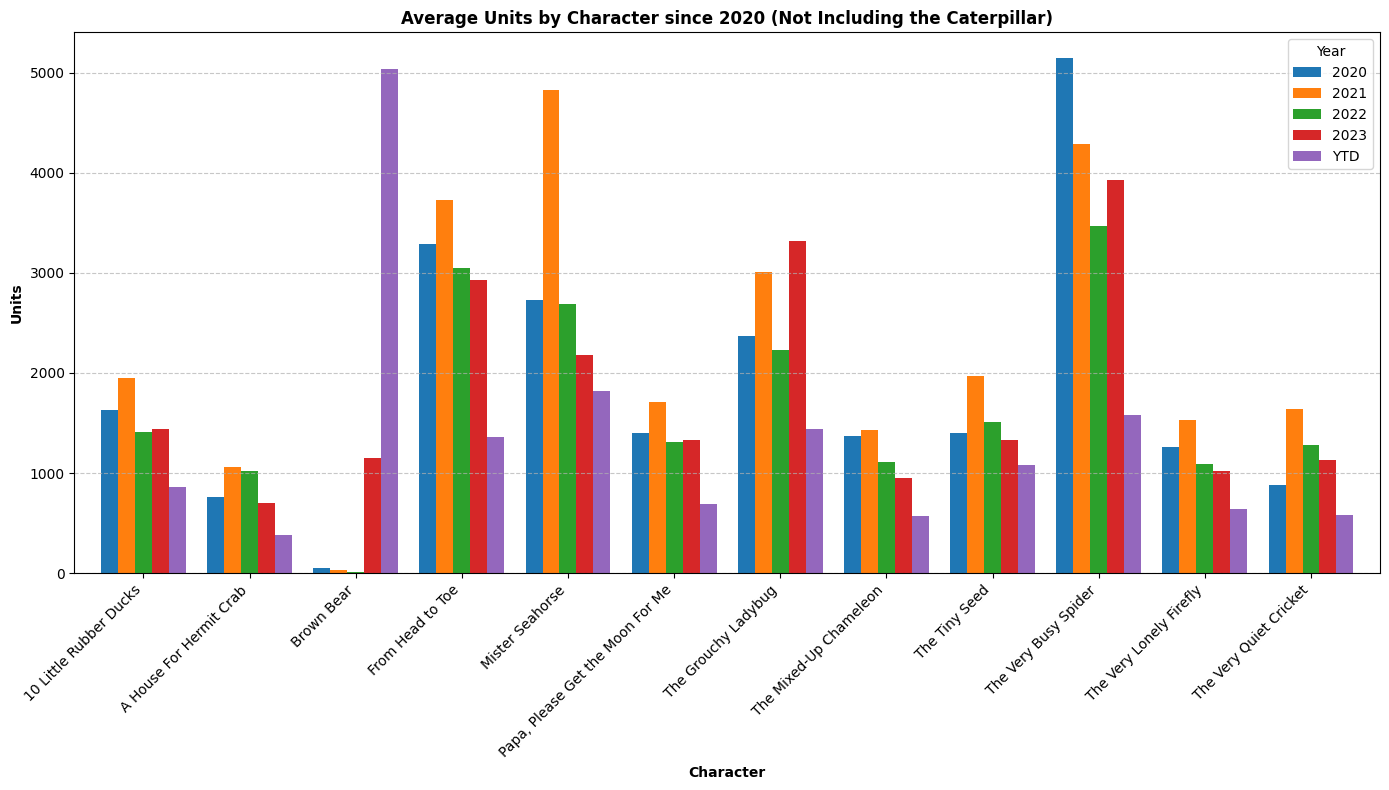

<Figure size 1400x800 with 0 Axes>

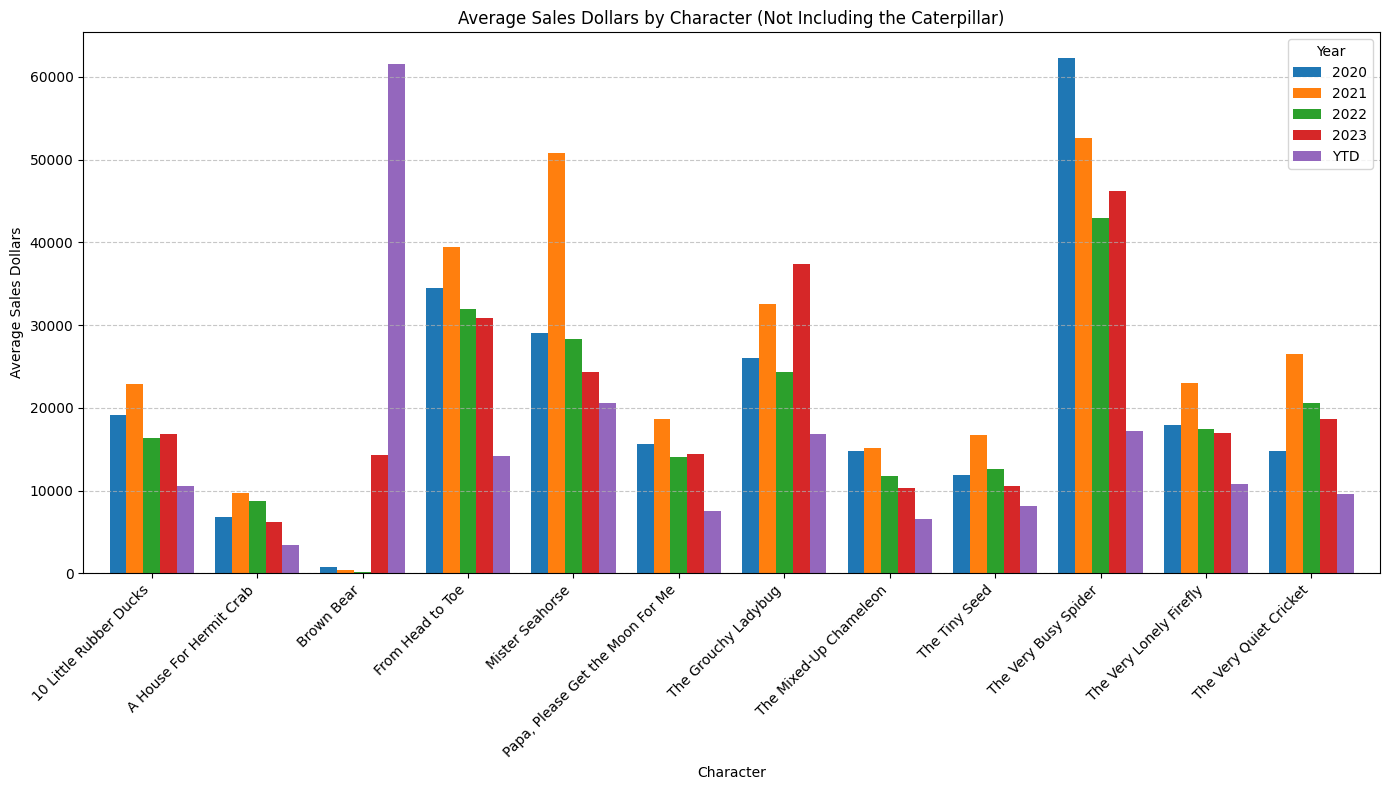

In [98]:
import matplotlib.pyplot as plt

# Plotting average sales per year for each character without values
plt.figure(figsize=(14, 8))
ax = filtered_character_sales.set_index('Character')[['Average Sales 2020', 'Average Sales 2021', 'Average Sales 2022', 'Average Sales 2023', 'Average YTD Sales']].plot(kind='bar', figsize=(14, 8), width=0.8)

plt.title('Average Units by Character since 2020 (Not Including the Caterpillar)', fontweight='bold')
plt.xlabel('Character', fontweight='bold')
plt.ylabel('Units', fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Year', labels=['2020', '2021', '2022', '2023', 'YTD'], loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Plotting average sales dollars per year for each character without values
plt.figure(figsize=(14, 8))
ax = filtered_character_sales.set_index('Character')[['Average Dollars 2020', 'Average Dollars 2021', 'Average Dollars 2022', 'Average Dollars 2023', 'Average YTD Dollars']].plot(kind='bar', figsize=(14, 8), width=0.8)

plt.title('Average Sales Dollars by Character (Not Including the Caterpillar)')
plt.xlabel('Character')
plt.ylabel('Average Sales Dollars')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Year', labels=['2020', '2021', '2022', '2023', 'YTD'], loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [27]:
#looking at characters other than caterpillar -- bear rising this year 

In [227]:
filtered_character_sales[['Character', 'Average Sales 2020','Average Sales 2021','Average Sales 2022','Average Sales 2023', 'Average YTD Sales']]

,Character,Average Sales 2020,Average Sales 2021,Average Sales 2022,Average Sales 2023,Average YTD Sales
0,10 Little Rubber Ducks,1626.428571,1953.142857,1412.428571,1440.000000,862.428571
1,A House For Hermit Crab,763.846154,1063.538462,1017.846154,706.307692,385.846154
2,Brown Bear,52.400000,28.933333,12.600000,1151.800000,5032.933333
3,From Head to Toe,3292.333333,3729.266667,3044.466667,2924.933333,1362.133333
4,Mister Seahorse,2729.333333,4830.333333,2692.666667,2174.833333,1821.666667
6,"Papa, Please Get the Moon For Me",1404.500000,1705.600000,1312.600000,1333.800000,694.000000
7,The Grouchy Ladybug,2368.631579,3008.105263,2228.631579,3318.736842,1441.315789
8,The Mixed-Up Chameleon,1368.800000,1433.300000,1108.200000,949.500000,573.500000
9,The Tiny Seed,1396.352941,1972.294118,1505.470588,1331.764706,1076.352941
10,The Very Busy Spider,5144.130435,4284.652174,3465.826087,3928.521739,1577.695652


In [28]:
# publisher

In [29]:
def categorize_publisher(publisher):
    if publisher in ['Harpercollins Publishers', 'Macmillan', 'Simon & Schuster', 'Hachette Book Group']:
        return publisher
    elif publisher in ['Penguin Group Usa', 'Random House']:
        return 'Penguin'
    else:
        return 'Other'

# Apply the categorization function
df3['Publisher Category'] = df3['Publisher'].apply(categorize_publisher)

# Summarize the data for each publisher category
publisher_category_sales = df3.groupby('Publisher Category').agg({
    'Title': 'count',
    '2020': 'sum',
    '2021': 'sum',
    '2022': 'sum',
    '2023': 'sum',
    'YTD Sales': 'sum',
    '2020 Dollars': 'sum',
    '2021 Dollars': 'sum',
    '2022 Dollars': 'sum',
    '2023 Dollars': 'sum',
    'YTD Dollars': 'sum'
}).reset_index()

# Rename the 'Title' column to 'Count'
publisher_category_sales.rename(columns={'Title': 'Count'}, inplace=True)

# Calculate the total units and dollars for each publisher category
publisher_category_sales['Total Units'] = publisher_category_sales[['2020', '2021', '2022', '2023', 'YTD Sales']].sum(axis=1)
publisher_category_sales['Total Dollars'] = publisher_category_sales[['2020 Dollars', '2021 Dollars', '2022 Dollars', '2023 Dollars', 'YTD Dollars']].sum(axis=1)
publisher_category_sales[['Publisher Category', 'Count', 'Total Units', 'Total Dollars']]


/var/tmp/ipykernel_3356303/2313916467.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Publisher Category'] = df3['Publisher'].apply(categorize_publisher)


,Publisher Category,Count,Total Units,Total Dollars
0,Hachette Book Group,3,0,0.00
1,Harpercollins Publishers,44,652106,7831972.80
2,Macmillan,13,98804,1228965.96
3,Other,168,13320,182592.02
4,Penguin,249,7820752,88759908.37
5,Simon & Schuster,79,1905394,16133652.57


In [31]:
import pandas as pd

def categorize_publisher(publisher):
    if publisher in ['Harpercollins Publishers', 'Macmillan', 'Simon & Schuster']:
        return publisher
    elif publisher in ['Penguin Group Usa', 'Random House']:
        return 'Penguin'
    else:
        return 'Other'

# Apply the categorization function
df3['Publisher Category'] = df3['Publisher'].apply(categorize_publisher)

# Summarize the data for each publisher category
publisher_category_sales = df3.groupby('Publisher Category').agg({
    'Title': 'count',
    '2020': 'sum',
    '2021': 'sum',
    '2022': 'sum',
    '2023': 'sum',
    'YTD Sales': 'sum',
    '2020 Dollars': 'sum',
    '2021 Dollars': 'sum',
    '2022 Dollars': 'sum',
    '2023 Dollars': 'sum',
    'YTD Dollars': 'sum'
}).reset_index()

# Rename the 'Title' column to 'Count'
publisher_category_sales.rename(columns={'Title': 'Count'}, inplace=True)

# Calculate the total units and dollars for each publisher category
publisher_category_sales['Total Units'] = publisher_category_sales[['2020', '2021', '2022', '2023', 'YTD Sales']].sum(axis=1)
publisher_category_sales['Total Dollars'] = publisher_category_sales[['2020 Dollars', '2021 Dollars', '2022 Dollars', '2023 Dollars', 'YTD Dollars']].sum(axis=1)

# Filter out Hachette Book Group if it has zero sales
publisher_category_sales = publisher_category_sales[publisher_category_sales['Total Units'] > 0]

# Display the publisher performance summary
publisher_category_sales[['Publisher Category', 'Count', 'Total Units', 'Total Dollars']]


/var/tmp/ipykernel_3356303/89698738.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Publisher Category'] = df3['Publisher'].apply(categorize_publisher)


,Publisher Category,Count,Total Units,Total Dollars
0,Harpercollins Publishers,44,652106,7831972.80
1,Macmillan,13,98804,1228965.96
2,Other,171,13320,182592.02
3,Penguin,249,7820752,88759908.37
4,Simon & Schuster,79,1905394,16133652.57


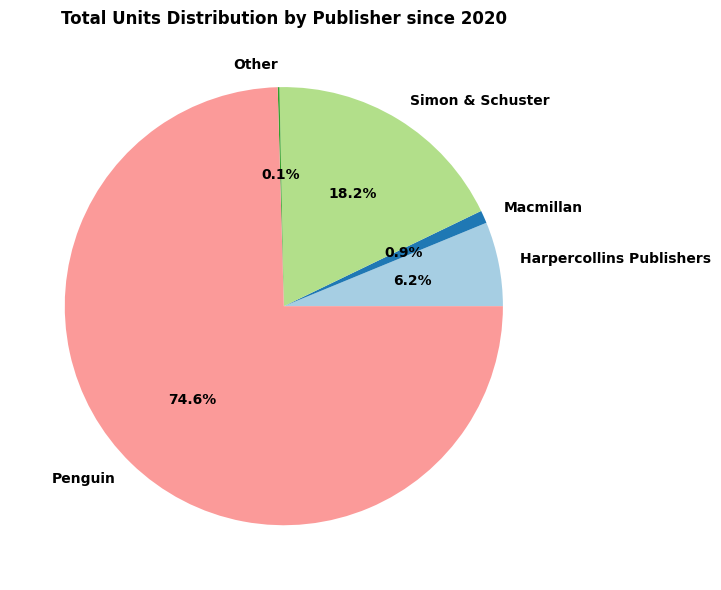

         Publisher Category  Count  Total Units  Total Dollars
0  Harpercollins Publishers     44       652106     7831972.80
1                 Macmillan     13        98804     1228965.96
4          Simon & Schuster     79      1905394    16133652.57
2                     Other    171        13320      182592.02
3                   Penguin    249      7820752    88759908.37


In [198]:
order = ['Harpercollins Publishers', 'Macmillan', 'Simon & Schuster', 'Other', 'Penguin']
publisher_category_sales['Publisher Category'] = pd.Categorical(publisher_category_sales['Publisher Category'], categories=order, ordered=True)
publisher_category_sales = publisher_category_sales.sort_values('Publisher Category')

fig, ax = plt.subplots(figsize=(10, 6))

# Pie chart for total units by publisher category
ax.pie(publisher_category_sales['Total Units'], labels=publisher_category_sales['Publisher Category'], autopct='%1.1f%%', colors=plt.cm.Paired.colors, textprops={'weight': 'bold'})
ax.set_title('Total Units Distribution by Publisher since 2020', weight='bold')

plt.tight_layout()
plt.show()
axes[0].set_title('Total Units Distribution by Publisher since 2020', weight='bold')


print(publisher_category_sales[['Publisher Category', 'Count', 'Total Units', 'Total Dollars']])

/var/tmp/ipykernel_3356303/3031270248.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(['HarperCollins', 'Macmillan', 'Simon & Schuster', 'Other', 'Penguin'], fontsize=10)
/var/tmp/ipykernel_3356303/3031270248.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(['HarperCollins', 'Macmillan', 'Simon & Schuster', 'Other', 'Penguin'], fontsize=10)


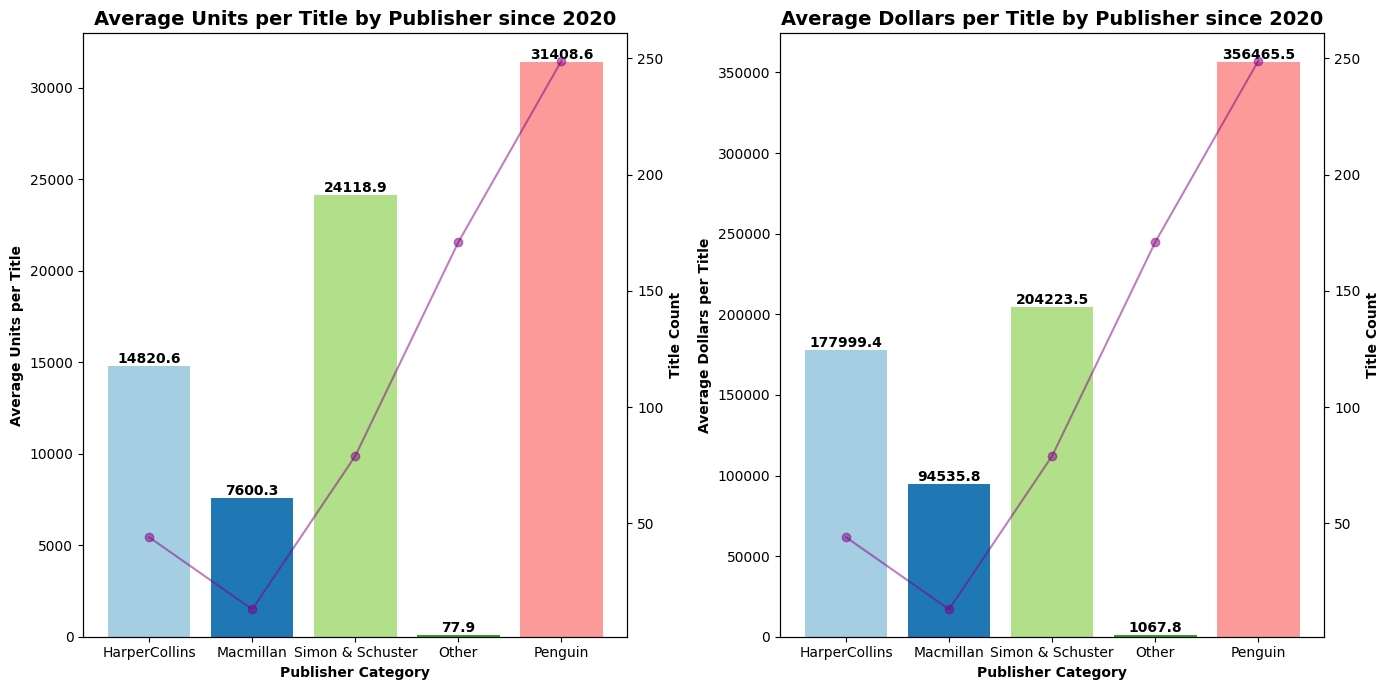

In [126]:
# Calculate average units and dollars per title for each publisher category
publisher_category_sales['Average Units per Title'] = publisher_category_sales['Total Units'] / publisher_category_sales['Count']
publisher_category_sales['Average Dollars per Title'] = publisher_category_sales['Total Dollars'] / publisher_category_sales['Count']

# Plot average units and dollars per publisher category as bar charts with bold axis titles
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

# Bar chart for average units per title by publisher category
bars_units = axes[0].bar(publisher_category_sales['Publisher Category'], publisher_category_sales['Average Units per Title'], color=plt.cm.Paired.colors)
axes[0].set_title('Average Units per Title by Publisher since 2020', fontsize=14, weight='bold')
axes[0].set_ylabel('Average Units per Title', fontsize=10, weight='bold')
axes[0].set_xlabel('Publisher Category', fontsize=10, weight='bold')
axes[0].set_xticklabels(['HarperCollins', 'Macmillan', 'Simon & Schuster', 'Other', 'Penguin'], fontsize=10)
axes[0].tick_params(axis='x', labelrotation=0, labelsize=10)

# Add values on top of bars
for bar in bars_units:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 1), ha='center', va='bottom', fontsize=10, weight='bold')

# Plotting count per publisher on the right Y axis of the first plot
axes2 = axes[0].twinx()
lines = axes2.plot(publisher_category_sales['Publisher Category'], publisher_category_sales['Count'],  color='purple', marker='o', alpha=0.5, label='Count')
axes2.set_ylabel('Title Count', fontsize=10, weight='bold')

# Bar chart for average dollars per title by publisher category
bars_dollars = axes[1].bar(publisher_category_sales['Publisher Category'], publisher_category_sales['Average Dollars per Title'], color=plt.cm.Paired.colors)
axes[1].set_title('Average Dollars per Title by Publisher since 2020', fontsize=14, weight='bold')
axes[1].set_ylabel('Average Dollars per Title', fontsize=10, weight='bold')
axes[1].set_xlabel('Publisher Category', fontsize=10, weight='bold')
axes[1].set_xticklabels(['HarperCollins', 'Macmillan', 'Simon & Schuster', 'Other', 'Penguin'], fontsize=10)
axes[1].tick_params(axis='x', labelrotation=0, labelsize=10)

# Add values on top of bars
for bar in bars_dollars:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 1), ha='center', va='bottom', fontsize=10, weight='bold')

# Plotting count per publisher on the right Y axis of the second plot
axes3 = axes[1].twinx()
lines = axes3.plot(publisher_category_sales['Publisher Category'], publisher_category_sales['Count'], color='purple', marker='o', alpha=0.5, label='Count')
axes3.set_ylabel('Title Count', fontsize=10, weight='bold')
plt.tight_layout()
plt.show()

In [231]:
publisher_category_sales

,Publisher Category,Count,2020,2021,2022,2023,YTD Sales,2020 Dollars,2021 Dollars,2022 Dollars,2023 Dollars,YTD Dollars,Total Units,Total Dollars,Average Units per Title,Average Dollars per Title
0,Harpercollins Publishers,44,142442,166340,127377,142266,73681,1734299.88,2037416.06,1513036.08,1675050.59,872170.19,652106,7831972.80,14820.590909,177999.381818
1,Macmillan,13,1622,1656,1981,17999,75546,23814.78,26386.44,27888.19,225819.01,925057.54,98804,1228965.96,7600.307692,94535.843077
4,Simon & Schuster,79,262679,392002,423110,515060,312543,2375880.59,3339264.86,3582411.28,4282667.43,2553428.41,1905394,16133652.57,24118.911392,204223.450253
2,Other,171,4545,3633,1146,2334,1662,61911.48,49254.69,14557.48,32874.44,23993.93,13320,182592.02,77.894737,1067.789591
3,Penguin,249,1435869,1704903,1759323,1856639,1064018,16691079.15,19752114.80,19632417.28,20792545.14,11891752.00,7820752,88759908.37,31408.642570,356465.495462


In [33]:
#also see what the best books are by publusher

In [87]:
title_sales = df3.groupby(['Publisher Category', 'Title', 'Format','Price']).agg({
    '2020': 'sum',
    '2021': 'sum',
    '2022': 'sum',
    '2023': 'sum',
    'YTD Sales': 'sum',
    '2020 Dollars': 'sum',
    '2021 Dollars': 'sum',
    '2022 Dollars': 'sum',
    '2023 Dollars': 'sum',
    'YTD Dollars': 'sum'
}).reset_index()

# Sum the total units and dollars since 2020 for each title
title_sales['Total Units'] = title_sales[['2020', '2021', '2022', '2023', 'YTD Sales']].sum(axis=1)
title_sales['Total Dollars'] = title_sales[['2020 Dollars', '2021 Dollars', '2022 Dollars', '2023 Dollars', 'YTD Dollars']].sum(axis=1)

# Sort the titles within each publisher by total units and total dollars
title_sales = title_sales.sort_values(['Publisher Category', 'Total Units', 'Total Dollars'], ascending=[True, False, False])

# Display the top titles for each publisher
top_titles_per_publisher = title_sales.groupby('Publisher Category').head(5)

In [138]:
pd.set_option('display.max_colwidth', None)
top_titles_per_publisher[['Publisher Category','Title','Format','Price']]

,Publisher Category,Title,Format,Price
17,Harpercollins Publishers,From Head to Toe,Board Books,9.99
31,Harpercollins Publishers,The Grouchy Ladybug Board Book,Board Books,9.99
30,Harpercollins Publishers,The Grouchy Ladybug,Trade Paperback,9.99
41,Harpercollins Publishers,You Are Ready!: the World Is Waiting,Hardcover,12.99
2,Harpercollins Publishers,10 Little Rubber Ducks Board Book: an Easter and Springtime Book For Kids,Board Books,10.99
45,Macmillan,Bear Hugs! from Brown Bear and Friends (World of Eric Carle),Board Books,8.99
46,Macmillan,Bear Hugs! from Brown Bear and Friends (World of Eric Carle) Oversize Edition,Board Books,14.99
44,Macmillan,Baby Bear's Busy Day With Brown Bear and Friends (World of Eric Carle),Board Books,12.99
48,Macmillan,Brown Bear and Friends Abc (World of Eric Carle),Board Books,12.99
47,Macmillan,Brown Bear and Friends 123 (World of Eric Carle),Board Books,12.99


In [68]:
publisher_category_sales

,Publisher Category,Count,2020,2021,2022,2023,YTD Sales,2020 Dollars,2021 Dollars,2022 Dollars,2023 Dollars,YTD Dollars,Total Units,Total Dollars,Average Units per Title,Average Dollars per Title
0,Harpercollins Publishers,44,142442,166340,127377,142266,73681,1734299.88,2037416.06,1513036.08,1675050.59,872170.19,652106,7831972.80,14820.590909,177999.381818
1,Macmillan,13,1622,1656,1981,17999,75546,23814.78,26386.44,27888.19,225819.01,925057.54,98804,1228965.96,7600.307692,94535.843077
4,Simon & Schuster,79,262679,392002,423110,515060,312543,2375880.59,3339264.86,3582411.28,4282667.43,2553428.41,1905394,16133652.57,24118.911392,204223.450253
2,Other,171,4545,3633,1146,2334,1662,61911.48,49254.69,14557.48,32874.44,23993.93,13320,182592.02,77.894737,1067.789591
3,Penguin,249,1435869,1704903,1759323,1856639,1064018,16691079.15,19752114.80,19632417.28,20792545.14,11891752.00,7820752,88759908.37,31408.642570,356465.495462


In [69]:
# Group by format and publisher to see the count per format by publisher
format_publisher_summary = df3.groupby(['Publisher Category', 'Format']).agg({
    'Title': 'count'
}).reset_index().rename(columns={'Title': 'Count'})

print("\nFormat and Publisher Summary")
format_publisher_summary


Format and Publisher Summary


,Publisher Category,Format,Count
0,Harpercollins Publishers,Board Books,12
1,Harpercollins Publishers,Hardcover,20
2,Harpercollins Publishers,Trade Paperback,12
3,Macmillan,Board Books,9
4,Macmillan,Hardcover,4
5,Other,Board Books,14
6,Other,Boxed Set,1
7,Other,Hardcover,99
8,Other,Mass Market Paperback,5
9,Other,Other,11


In [70]:
# books published in the past 1-1.5 years

In [71]:
import datetime

In [72]:
# Define the date range for new books (1.5 years)
current_date = datetime.datetime.now()
start_date = current_date - datetime.timedelta(days=1.5*365)

# Identify new books published in the past 1-1.5 years
new_books = df3[df3['Publication Date'] >= start_date]

# Calculate the total units and dollars for these new books
new_books_sales = new_books.groupby(['Publisher', 'Format', 'Title','ISBN', 'Publication Date']).agg({
    '2020': 'sum',
    '2021': 'sum',
    '2022': 'sum',
    '2023': 'sum',
    'YTD Sales': 'sum',
    '2020 Dollars': 'sum',
    '2021 Dollars': 'sum',
    '2022 Dollars': 'sum',
    '2023 Dollars': 'sum',
    'YTD Dollars': 'sum',
    'Price': 'mean'  # Calculate the average price for each title (optional)
}).reset_index()

# Sum the total units and dollars for each new book
new_books_sales['Total Units'] = new_books_sales[['2020', '2021', '2022', '2023', 'YTD Sales']].sum(axis=1)
new_books_sales['Total Dollars'] = new_books_sales[['2020 Dollars', '2021 Dollars', '2022 Dollars', '2023 Dollars', 'YTD Dollars']].sum(axis=1)

In [167]:
new_books

,ISBN,Title,Author,Format,Price,Publisher,Publication Date,RTD Sales,BISAC Level 1,YTD Sales,...,2021,2020,YTD Dollars,2023 Dollars,2022 Dollars,2021 Dollars,2020 Dollars,RTD Dollars,Character,Publisher Category
114,9780593523155,I Love Grandma With the Very Hungry Caterpillar,Eric Carle,Hardcover,9.99,Penguin Group Usa,2023-03-14,40392,JUVENILE FICTION,23569,...,0,0,235454.31,168061.77,0.0,0.0,0.0,403516.08,The Very Hungry Caterpillar,Penguin
117,9780593659144,The Very Busy Spider's Forest Friends: a Touch-And-Feel Book,Eric Carle,Trade Paperback,9.99,Penguin Group Usa,2023-07-25,40066,JUVENILE FICTION,18576,...,0,0,185574.24,214685.10,0.0,0.0,0.0,400259.34,The Very Busy Spider,Penguin
129,9780593661055,The Very Hungry Caterpillar Loves [your Name Here]!: a Personalized Story Book,Eric Carle,Board Books,10.99,Penguin Group Usa,2023-12-12,33821,JUVENILE FICTION,31855,...,0,0,350086.45,21595.35,0.0,0.0,0.0,371692.79,The Very Hungry Caterpillar,Penguin
130,9780593750179,The Very Hungry Caterpillar's Peekaboo Easter,Eric Carle,Board Books,9.99,Penguin Group Usa,2024-01-16,33584,JUVENILE FICTION,33584,...,0,0,335504.16,0.00,0.0,0.0,0.0,335504.16,The Very Hungry Caterpillar,Penguin
144,9781250891426,Bear Hugs! from Brown Bear and Friends (World of Eric Carle),Eric Carle,Board Books,8.99,Macmillan,2023-11-07,29184,JUVENILE FICTION,26114,...,0,0,234764.86,27599.30,0.0,0.0,0.0,262364.16,Brown Bear,Macmillan
148,9780593523162,I Love Grandpa With the Very Hungry Caterpillar,Eric Carle,Hardcover,9.99,Penguin Group Usa,2023-03-14,28086,JUVENILE FICTION,17119,...,0,0,171018.81,109550.34,0.0,0.0,0.0,280579.14,The Very Hungry Caterpillar,Penguin
151,9780593659168,The Very Hungry Caterpillar's Rainbow Colors,Eric Carle,Board Books,10.99,Penguin Group Usa,2023-05-30,27652,JUVENILE FICTION,17792,...,0,0,195534.08,108361.40,0.0,0.0,0.0,303895.48,The Very Hungry Caterpillar,Penguin
156,9781250892782,Bear Hugs! from Brown Bear and Friends (World of Eric Carle) Oversize Edition,Eric Carle,Board Books,14.99,Macmillan,2023-11-07,24688,JUVENILE FICTION,23697,...,0,0,355218.03,14855.09,0.0,0.0,0.0,370073.12,Brown Bear,Macmillan
177,9780593523797,The Very Hungry Caterpillar's Garden Friends: a Touch-And-Feel Book,Eric Carle,Hardcover,9.99,Penguin Group Usa,2023-02-07,20627,JUVENILE FICTION,3930,...,0,0,39260.70,166803.03,0.0,0.0,0.0,206063.73,The Very Hungry Caterpillar,Penguin
187,9780062985712,Spring Sings For the Grouchy Ladybug,Eric Carle,Hardcover,12.99,Harpercollins Publishers,2023-02-07,18990,JUVENILE FICTION,5322,...,0,0,69132.78,177534.33,0.0,0.0,0.0,246680.10,The Grouchy Ladybug,Harpercollins Publishers


In [170]:
summary_by_format = new_books.groupby('Format').agg({
    'RTD Sales': 'sum',
    'YTD Sales': 'sum',
    'RTD Dollars': 'sum',
    'Price': 'mean',
    'Title': 'count'
}).reset_index()

summary_by_publisher = new_books.groupby('Publisher Category').agg({
    'RTD Sales': 'sum',
    'YTD Sales': 'sum',
    'RTD Dollars': 'sum',
    'Price': 'mean',
    'Title': 'count'
}).reset_index()

summary_by_character = new_books.groupby('Character').agg({
    'RTD Sales': 'sum',
    'YTD Sales': 'sum',
    'RTD Dollars': 'sum',
    'Price': 'mean',
    'Title': 'count'
}).reset_index()

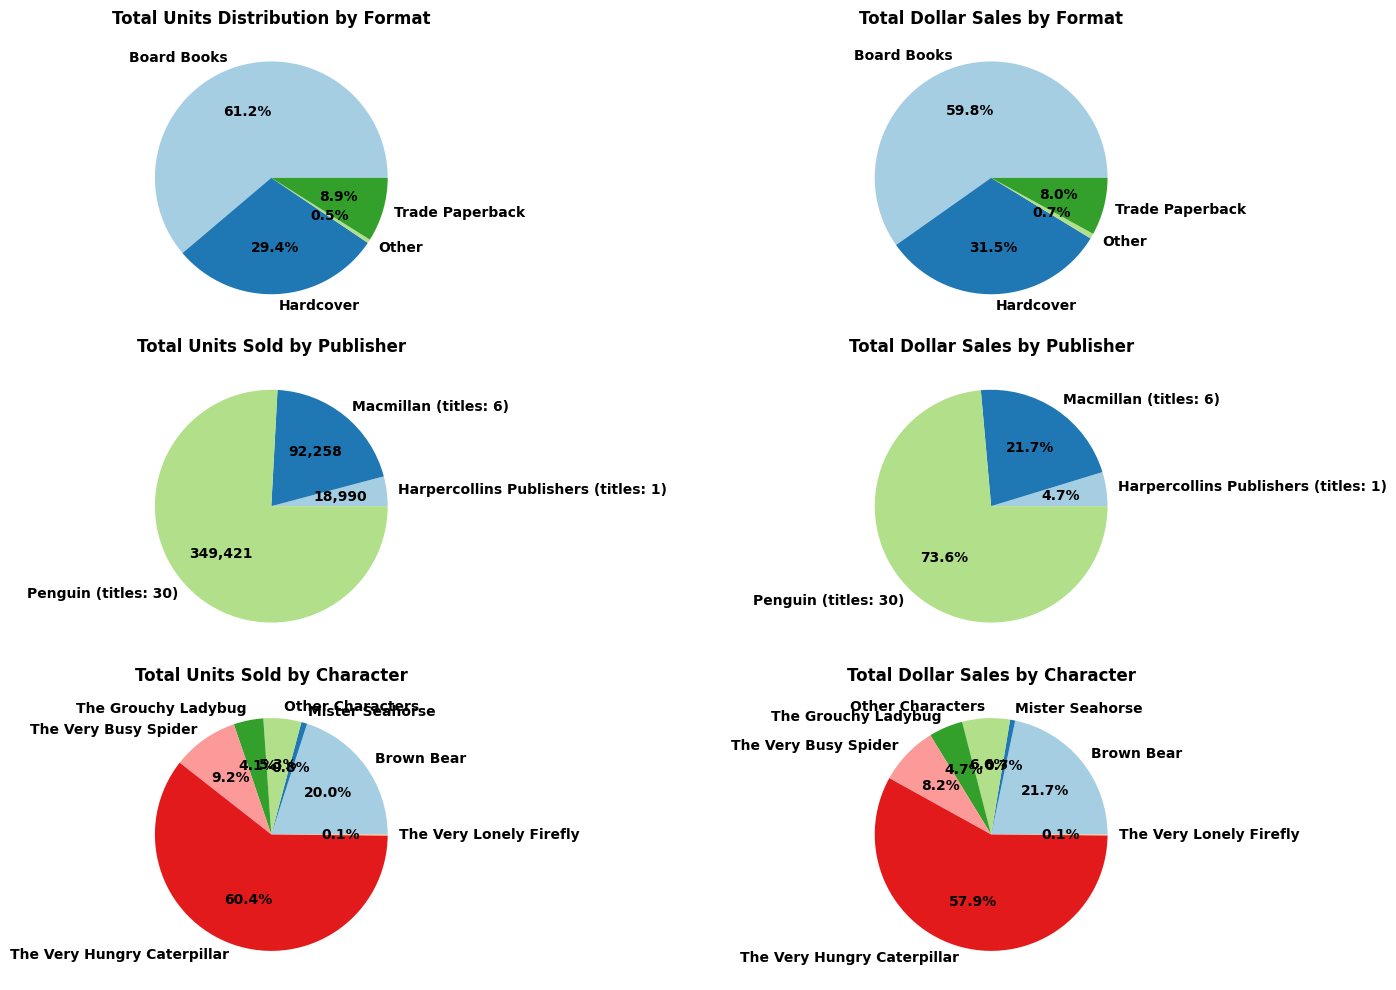

In [186]:
# Function to format labels with count and units
def format_label_with_count_units(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return f'{absolute:,}'

# Function to format labels
def format_label(value):
    if value >= 1e6:
        return f'{value / 1e6:.1f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.0f}K'
    else:
        return f'{value:.0f}'

# Pie charts
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

# Pie chart for total units by format
axes[0, 0].pie(summary_by_format['RTD Sales'], labels=summary_by_format['Format'], autopct='%1.1f%%', colors=plt.cm.Paired.colors, textprops={'weight': 'bold'})
axes[0, 0].set_title('Total Units Distribution by Format', fontweight='bold')

# Pie chart for total dollars by format
axes[0, 1].pie(summary_by_format['RTD Dollars'], labels=summary_by_format['Format'], autopct='%1.1f%%', colors=plt.cm.Paired.colors, textprops={'weight': 'bold'})
axes[0, 1].set_title('Total Dollar Sales by Format', fontweight='bold')

# Pie chart for total units by publisher with title count and units
labels_with_count = [f'{label} (titles: {count})' for label, count in zip(summary_by_publisher['Publisher Category'], summary_by_publisher['Title'])]
axes[1, 0].pie(summary_by_publisher['RTD Sales'], labels=labels_with_count, autopct=lambda pct: format_label_with_count_units(pct, summary_by_publisher['RTD Sales']), colors=plt.cm.Paired.colors, textprops={'weight': 'bold'})
axes[1, 0].set_title('Total Units Sold by Publisher', fontweight='bold')

# Pie chart for total dollars by publisher
axes[1, 1].pie(summary_by_publisher['RTD Dollars'], labels=labels_with_count, autopct='%1.1f%%', colors=plt.cm.Paired.colors, textprops={'weight': 'bold'})
axes[1, 1].set_title('Total Dollar Sales by Publisher', fontweight='bold')

# Pie chart for total units by character
axes[2, 0].pie(summary_by_character['RTD Sales'], labels=summary_by_character['Character'], autopct='%1.1f%%', colors=plt.cm.Paired.colors, textprops={'weight': 'bold'})
axes[2, 0].set_title('Total Units Sold by Character', fontweight='bold')

# Pie chart for total dollars by character
axes[2, 1].pie(summary_by_character['RTD Dollars'], labels=summary_by_character['Character'], autopct='%1.1f%%', colors=plt.cm.Paired.colors, textprops={'weight': 'bold'})
axes[2, 1].set_title('Total Dollar Sales by Character', fontweight='bold')

plt.tight_layout()
plt.show()

In [74]:
# Sort new books by total units and total dollars to find the best-performing books
best_books_by_units = new_books_sales.sort_values(by='Total Units', ascending=False).head(10)
best_books_by_dollars = new_books_sales.sort_values(by='Total Dollars', ascending=False).head(10)

In [164]:
best_books_by_units

,Publisher,Format,Title,ISBN,Publication Date,2020,2021,2022,2023,YTD Sales,2020 Dollars,2021 Dollars,2022 Dollars,2023 Dollars,YTD Dollars,Price,Total Units,Total Dollars,Color
27,Penguin Group Usa,Hardcover,I Love Grandma With the Very Hungry Caterpillar,9780593523155,2023-03-14,0,0,0,16823,23569,0.0,0.0,0.0,168061.77,235454.31,9.99,40392,403516.08,bisque
32,Penguin Group Usa,Trade Paperback,The Very Busy Spider's Forest Friends: a Touch-And-Feel Book,9780593659144,2023-07-25,0,0,0,21490,18576,0.0,0.0,0.0,214685.10,185574.24,9.99,40066,400259.34,bisque
14,Penguin Group Usa,Board Books,The Very Hungry Caterpillar Loves [your Name Here]!: a Personalized Story Book,9780593661055,2023-12-12,0,0,0,1965,31855,0.0,0.0,0.0,21595.35,350086.45,10.99,33820,371681.80,bisque
20,Penguin Group Usa,Board Books,The Very Hungry Caterpillar's Peekaboo Easter,9780593750179,2024-01-16,0,0,0,0,33584,0.0,0.0,0.0,0.00,335504.16,9.99,33584,335504.16,bisque
2,Macmillan,Board Books,Bear Hugs! from Brown Bear and Friends (World of Eric Carle),9781250891426,2023-11-07,0,0,0,3070,26114,0.0,0.0,0.0,27599.30,234764.86,8.99,29184,262364.16,indianred
28,Penguin Group Usa,Hardcover,I Love Grandpa With the Very Hungry Caterpillar,9780593523162,2023-03-14,0,0,0,10966,17119,0.0,0.0,0.0,109550.34,171018.81,9.99,28085,280569.15,bisque
21,Penguin Group Usa,Board Books,The Very Hungry Caterpillar's Rainbow Colors,9780593659168,2023-05-30,0,0,0,9860,17792,0.0,0.0,0.0,108361.40,195534.08,10.99,27652,303895.48,bisque
3,Macmillan,Board Books,Bear Hugs! from Brown Bear and Friends (World of Eric Carle) Oversize Edition,9781250892782,2023-11-07,0,0,0,991,23697,0.0,0.0,0.0,14855.09,355218.03,14.99,24688,370073.12,indianred
31,Penguin Group Usa,Hardcover,The Very Hungry Caterpillar's Garden Friends: a Touch-And-Feel Book,9780593523797,2023-02-07,0,0,0,16697,3930,0.0,0.0,0.0,166803.03,39260.70,9.99,20627,206063.73,bisque
0,Harpercollins Publishers,Hardcover,Spring Sings For the Grouchy Ladybug,9780062985712,2023-02-07,0,0,0,13667,5322,0.0,0.0,0.0,177534.33,69132.78,12.99,18989,246667.11,lightblue


In [75]:
best_books_by_units[['Publisher', 'Format', 'Title', 'ISBN','Publication Date', 'Total Units', 'Total Dollars', 'Price']]

,Publisher,Format,Title,ISBN,Publication Date,Total Units,Total Dollars,Price
27,Penguin Group Usa,Hardcover,I Love Grandma With the Very Hungry Caterpillar,9780593523155,2023-03-14,40392,403516.08,9.99
32,Penguin Group Usa,Trade Paperback,The Very Busy Spider's Forest Friends: a Touch...,9780593659144,2023-07-25,40066,400259.34,9.99
14,Penguin Group Usa,Board Books,The Very Hungry Caterpillar Loves [your Name H...,9780593661055,2023-12-12,33820,371681.80,10.99
20,Penguin Group Usa,Board Books,The Very Hungry Caterpillar's Peekaboo Easter,9780593750179,2024-01-16,33584,335504.16,9.99
2,Macmillan,Board Books,Bear Hugs! from Brown Bear and Friends (World ...,9781250891426,2023-11-07,29184,262364.16,8.99
28,Penguin Group Usa,Hardcover,I Love Grandpa With the Very Hungry Caterpillar,9780593523162,2023-03-14,28085,280569.15,9.99
21,Penguin Group Usa,Board Books,The Very Hungry Caterpillar's Rainbow Colors,9780593659168,2023-05-30,27652,303895.48,10.99
3,Macmillan,Board Books,Bear Hugs! from Brown Bear and Friends (World ...,9781250892782,2023-11-07,24688,370073.12,14.99
31,Penguin Group Usa,Hardcover,The Very Hungry Caterpillar's Garden Friends: ...,9780593523797,2023-02-07,20627,206063.73,9.99
0,Harpercollins Publishers,Hardcover,Spring Sings For the Grouchy Ladybug,9780062985712,2023-02-07,18989,246667.11,12.99


In [76]:
best_books_by_dollars[['Publisher', 'Format', 'Title', 'Publication Date', 'Total Units', 'Total Dollars', 'Price']]

,Publisher,Format,Title,Publication Date,Total Units,Total Dollars,Price
27,Penguin Group Usa,Hardcover,I Love Grandma With the Very Hungry Caterpillar,2023-03-14,40392,403516.08,9.99
32,Penguin Group Usa,Trade Paperback,The Very Busy Spider's Forest Friends: a Touch...,2023-07-25,40066,400259.34,9.99
14,Penguin Group Usa,Board Books,The Very Hungry Caterpillar Loves [your Name H...,2023-12-12,33820,371681.80,10.99
3,Macmillan,Board Books,Bear Hugs! from Brown Bear and Friends (World ...,2023-11-07,24688,370073.12,14.99
20,Penguin Group Usa,Board Books,The Very Hungry Caterpillar's Peekaboo Easter,2024-01-16,33584,335504.16,9.99
21,Penguin Group Usa,Board Books,The Very Hungry Caterpillar's Rainbow Colors,2023-05-30,27652,303895.48,10.99
26,Penguin Group Usa,Hardcover,Good Night With the Very Hungry Caterpillar,2023-07-18,15763,299339.37,18.99
28,Penguin Group Usa,Hardcover,I Love Grandpa With the Very Hungry Caterpillar,2023-03-14,28085,280569.15,9.99
2,Macmillan,Board Books,Bear Hugs! from Brown Bear and Friends (World ...,2023-11-07,29184,262364.16,8.99
0,Harpercollins Publishers,Hardcover,Spring Sings For the Grouchy Ladybug,2023-02-07,18989,246667.11,12.99


In [77]:
performance_analysis_units = best_books_by_units[['Publisher', 'Format', 'Title', 'Publication Date', 'Total Units', 'Total Dollars', 'Price']]
performance_analysis_dollars = best_books_by_dollars[['Publisher', 'Format', 'Title', 'Publication Date', 'Total Units', 'Total Dollars', 'Price']]

# Pricing Analysis: Look at the pricing of these new books
pricing_analysis = new_books_sales.groupby('Format').agg({
    'Price': 'mean',
    'Total Units': 'sum',
    'Total Dollars': 'sum'
}).reset_index()

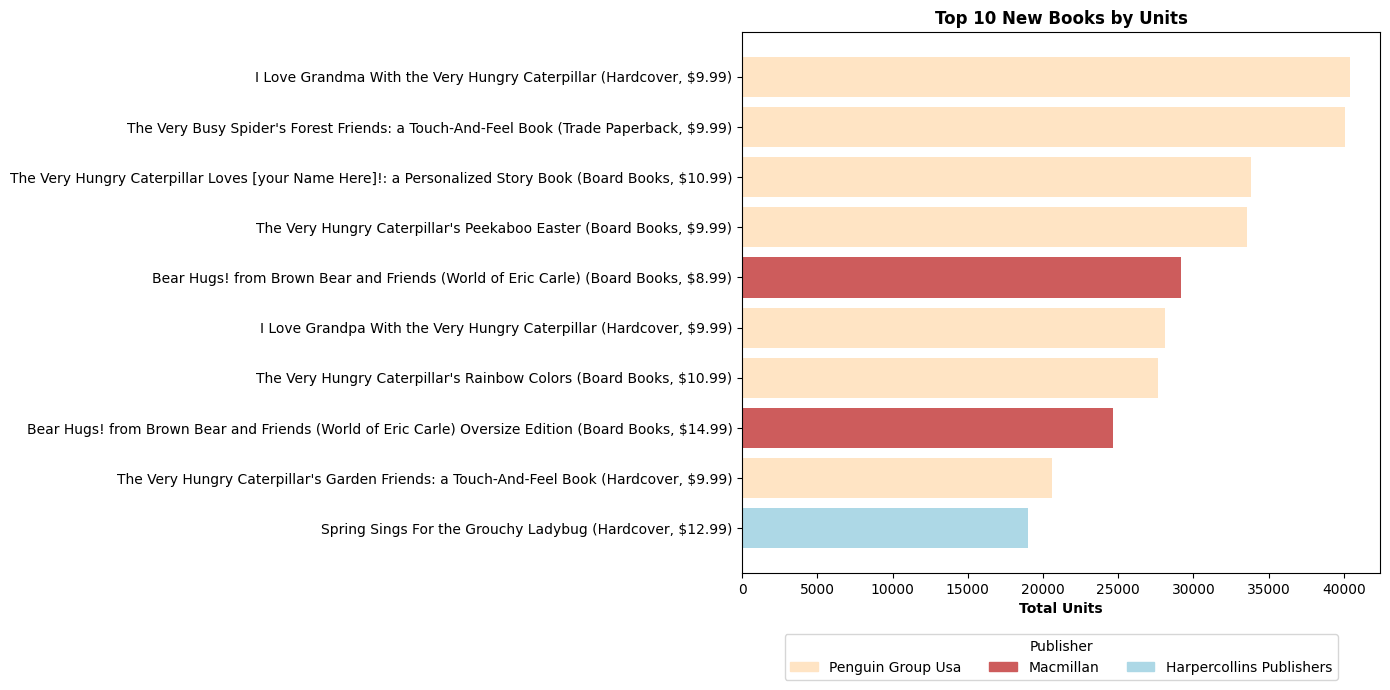

In [166]:
publisher_colors = {
    'Penguin Group Usa': 'bisque',
    'Macmillan': 'indianred',
    'Harpercollins Publishers': 'lightblue'
}

best_books_by_units['Color'] = best_books_by_units['Publisher'].map(publisher_colors)
best_books_by_units['Display Title'] = best_books_by_units.apply(lambda row: f"{row['Title']} ({row['Format']}, ${row['Price']})", axis=1)


# Performance Analysis by Units
plt.figure(figsize=(14, 7))
bars = plt.barh(best_books_by_units['Display Title'], best_books_by_units['Total Units'], color=best_books_by_units['Color'])
plt.xlabel('Total Units', fontweight='bold')
plt.title('Top 10 New Books by Units', fontweight='bold')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest values on top

# Create legend below the x-axis
handles = [plt.Rectangle((0,0),1,1, color=color) for color in publisher_colors.values()]
labels = publisher_colors.keys()
plt.legend(handles, labels, title='Publisher', loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=len(labels))

plt.tight_layout()
plt.show()

In [79]:
#check the weekly sales for the top books

In [80]:
price_point_data = new_books.groupby(['Format', 'Price']).size().reset_index(name='Count')

# Get unique formats
formats = price_point_data['Format'].unique()
formats

array(['Board Books', 'Hardcover', 'Other', 'Trade Paperback'],
      dtype=object)

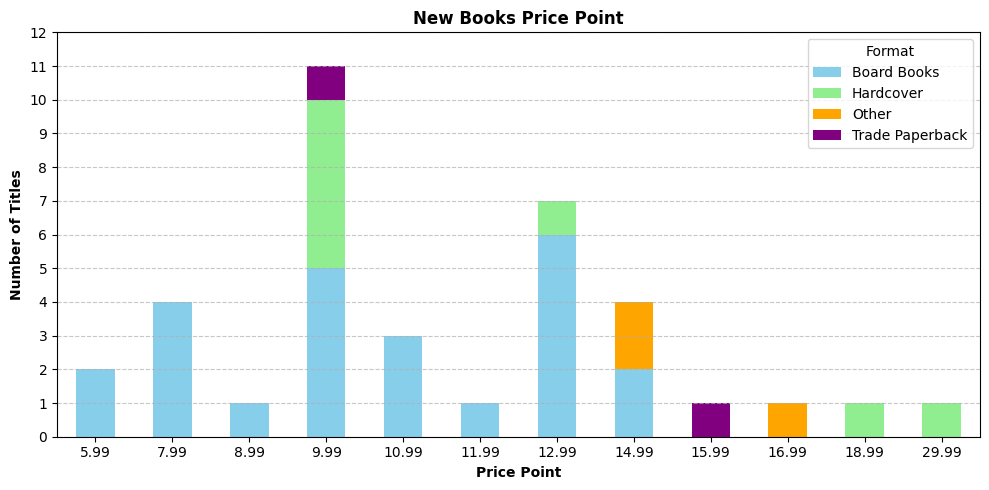

In [234]:
pivot_data = price_point_data.pivot(index='Price', columns='Format', values='Count').fillna(0)

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(10, 5))
pivot_data.plot(kind='bar', stacked=True, ax=ax, color=['skyblue', 'lightgreen', 'orange', 'purple'])
plt.xlabel('Price Point', fontweight='bold')
plt.ylabel('Number of Titles', fontweight = 'bold')
plt.title('New Books Price Point', fontweight ='bold')
plt.xticks(rotation=0)
plt.yticks(range(0, 13, 1))  # Set y-ticks from 0 to 12
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Format')
plt.tight_layout()
plt.show()

In [232]:
price_point_data

,Format,Price,Count
0,Board Books,5.99,2
1,Board Books,7.99,4
2,Board Books,8.99,1
3,Board Books,9.99,5
4,Board Books,10.99,3
5,Board Books,11.99,1
6,Board Books,12.99,6
7,Board Books,14.99,2
8,Hardcover,9.99,5
9,Hardcover,12.99,1


In [82]:
new_books.Format.value_counts()

Format
Board Books        24
Hardcover           8
Other               3
Trade Paperback     2
Name: count, dtype: int64

In [49]:
new_books_sales_by_format = new_books.groupby(['ISBN','Format', 'Title', 'Publication Date']).agg({
    '2020': 'sum',
    '2021': 'sum',
    '2022': 'sum',
    '2023': 'sum',
    'YTD Sales': 'sum',
    '2020 Dollars': 'sum',
    '2021 Dollars': 'sum',
    '2022 Dollars': 'sum',
    '2023 Dollars': 'sum',
    'YTD Dollars': 'sum',
}).reset_index()

# Sum the total units and dollars for each new book by format
new_books_sales_by_format['Total Units'] = new_books_sales_by_format[['2020', '2021', '2022', '2023', 'YTD Sales']].sum(axis=1)
new_books_sales_by_format['Total Dollars'] = new_books_sales_by_format[['2020 Dollars', '2021 Dollars', '2022 Dollars', '2023 Dollars', 'YTD Dollars']].sum(axis=1)

# Aggregate the results by Format
format_summary = new_books_sales_by_format.groupby('Format').agg({
    'Total Units': 'sum',
    'Total Dollars': 'sum',
    'Title': 'count'
}).reset_index()

# Display the summary of new books by format
print("New Books Performance by Format")
format_summary[['Format', 'Total Units', 'Total Dollars']]

New Books Performance by Format


,Format,Total Units,Total Dollars
0,Board Books,281878,3118714.22
1,Hardcover,135314,1643080.86
2,Other,2389,37685.11
3,Trade Paperback,41090,416633.10


In [50]:
format_summary['Average Units per Book'] = format_summary['Total Units'] / format_summary['Title']
format_summary['Average Dollars per Book'] = format_summary['Total Dollars'] 
# Display the summary of new books by format, including averages
print("New Books Performance by Format with Averages")
format_summary[['Format', 'Total Units', 'Total Dollars', 'Average Units per Book', 'Average Dollars per Book']]

New Books Performance by Format with Averages


,Format,Total Units,Total Dollars,Average Units per Book,Average Dollars per Book
0,Board Books,281878,3118714.22,11744.916667,3118714.22
1,Hardcover,135314,1643080.86,16914.250000,1643080.86
2,Other,2389,37685.11,796.333333,37685.11
3,Trade Paperback,41090,416633.10,20545.000000,416633.10


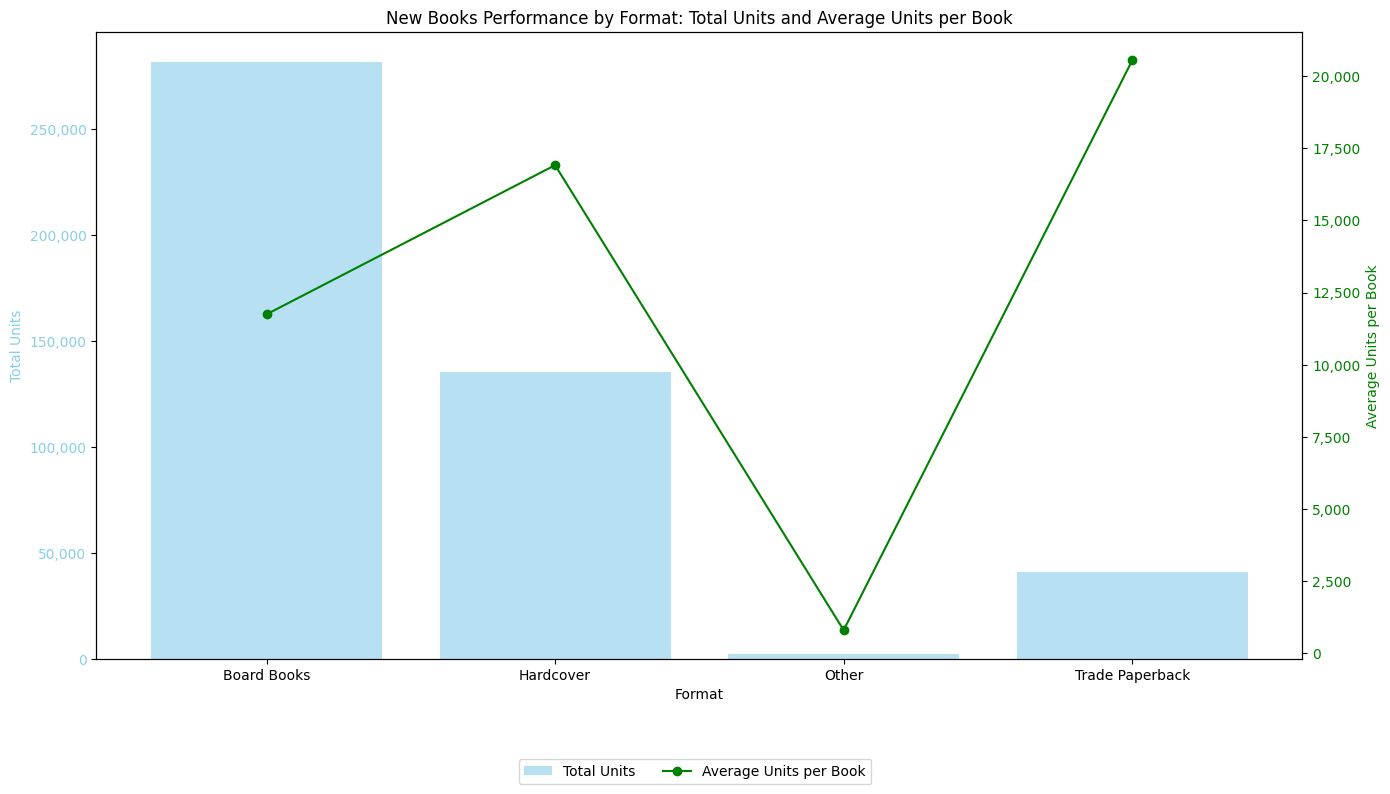

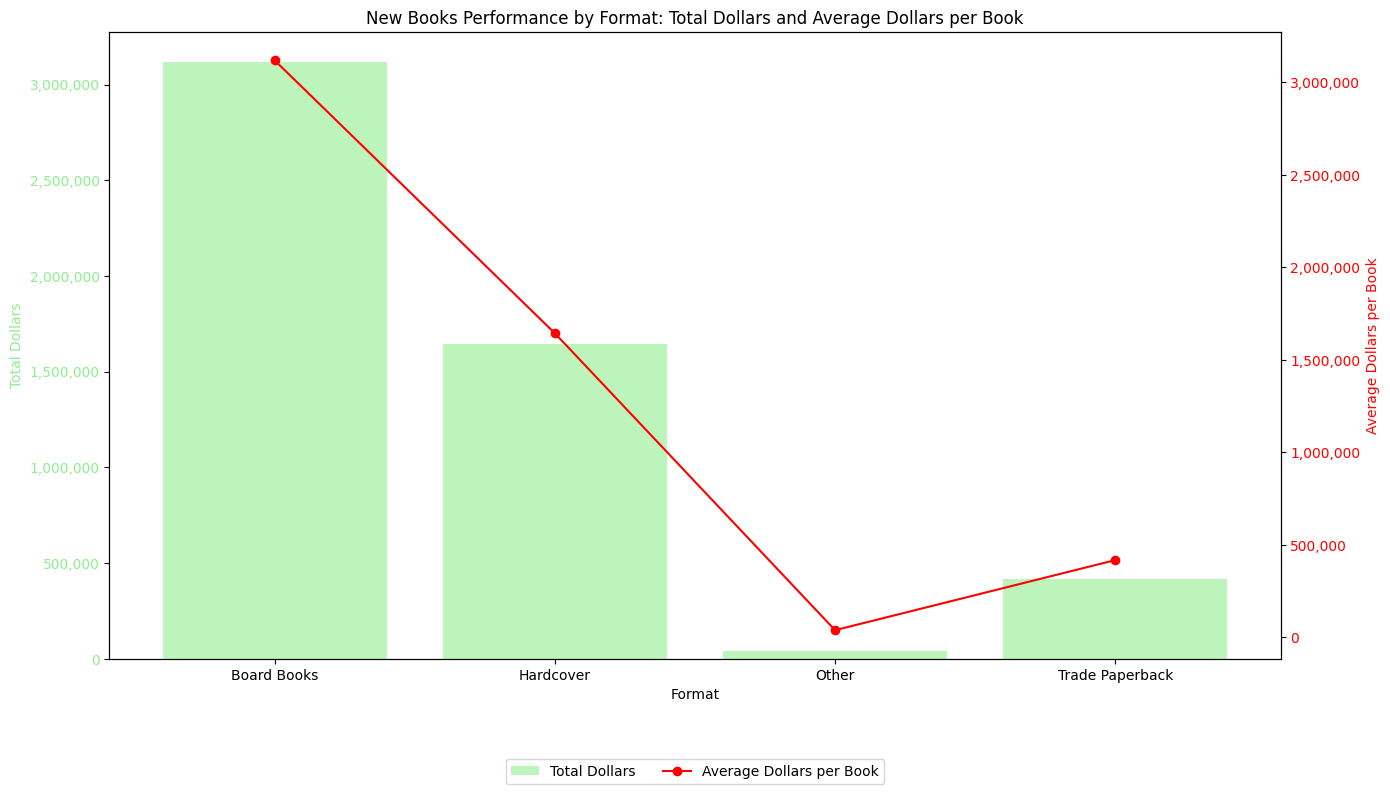

In [51]:
# Disable scientific notation for large numbers
pd.options.display.float_format = '{:.2f}'.format

fig, ax1 = plt.subplots(figsize=(14, 7))

# Total Units
ax1.bar(format_summary['Format'], format_summary['Total Units'], color='skyblue', alpha=0.6, label='Total Units')
ax1.set_xlabel('Format')
ax1.set_ylabel('Total Units', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))  # Format y-axis with normal numbers

# Average Units per Book
ax2 = ax1.twinx()
ax2.plot(format_summary['Format'], format_summary['Average Units per Book'], color='green', marker='o', label='Average Units per Book')
ax2.set_ylabel('Average Units per Book', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))  # Format y-axis with normal numbers

fig.tight_layout()
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
plt.title('New Books Performance by Format: Total Units and Average Units per Book')
plt.show()

# Plot Total Dollars and Average Dollars per Book
fig, ax1 = plt.subplots(figsize=(14, 7))

# Total Dollars
ax1.bar(format_summary['Format'], format_summary['Total Dollars'], color='lightgreen', alpha=0.6, label='Total Dollars')
ax1.set_xlabel('Format')
ax1.set_ylabel('Total Dollars', color='lightgreen')
ax1.tick_params(axis='y', labelcolor='lightgreen')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))  # Format y-axis with normal numbers

# Average Dollars per Book
ax2 = ax1.twinx()
ax2.plot(format_summary['Format'], format_summary['Average Dollars per Book'], color='red', marker='o', label='Average Dollars per Book')
ax2.set_ylabel('Average Dollars per Book', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))  # Format y-axis with normal numbers

fig.tight_layout()
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
plt.title('New Books Performance by Format: Total Dollars and Average Dollars per Book')
plt.show()

In [82]:
pd.set_option('display.max_colwidth', None)

In [84]:
best_books_by_units[['Publisher', 'Format', 'Title', 'ISBN','Publication Date', 'Total Units', 'Total Dollars', 'Price']]

,Publisher,Format,Title,ISBN,Publication Date,Total Units,Total Dollars,Price
27,Penguin Group Usa,Hardcover,I Love Grandma With the Very Hungry Caterpillar,9780593523155,2023-03-14,40392,403516.08,9.99
32,Penguin Group Usa,Trade Paperback,The Very Busy Spider's Forest Friends: a Touch-And-Feel Book,9780593659144,2023-07-25,40066,400259.34,9.99
14,Penguin Group Usa,Board Books,The Very Hungry Caterpillar Loves [your Name Here]!: a Personalized Story Book,9780593661055,2023-12-12,33820,371681.80,10.99
20,Penguin Group Usa,Board Books,The Very Hungry Caterpillar's Peekaboo Easter,9780593750179,2024-01-16,33584,335504.16,9.99
2,Macmillan,Board Books,Bear Hugs! from Brown Bear and Friends (World of Eric Carle),9781250891426,2023-11-07,29184,262364.16,8.99
28,Penguin Group Usa,Hardcover,I Love Grandpa With the Very Hungry Caterpillar,9780593523162,2023-03-14,28085,280569.15,9.99
21,Penguin Group Usa,Board Books,The Very Hungry Caterpillar's Rainbow Colors,9780593659168,2023-05-30,27652,303895.48,10.99
3,Macmillan,Board Books,Bear Hugs! from Brown Bear and Friends (World of Eric Carle) Oversize Edition,9781250892782,2023-11-07,24688,370073.12,14.99
31,Penguin Group Usa,Hardcover,The Very Hungry Caterpillar's Garden Friends: a Touch-And-Feel Book,9780593523797,2023-02-07,20627,206063.73,9.99
0,Harpercollins Publishers,Hardcover,Spring Sings For the Grouchy Ladybug,9780062985712,2023-02-07,18989,246667.11,12.99


In [54]:
# group by character as well

In [53]:
bestnewbooksweekly = pd.read_csv('Eric Carle New Books by Week.csv')
bestnewbooksweekly.columns

Index([' Week ',
       ' The Very Busy Spider's Forest Friends: a Touch-And-Feel Book 9780593659144 ',
       ' I Love Grandma With the Very Hungry Caterpillar 9780593523155 ',
       ' The Very Hungry Caterpillar Loves [your Name Here]!: a Personalized Story Book 9780593661055 ',
       ' The Very Hungry Caterpillar's Peekaboo Easter 9780593750179 ',
       ' Bear Hugs! from Brown Bear and Friends (World of Eric Carle) 9781250891426 ',
       ' I Love Grandpa With the Very Hungry Caterpillar 9780593523162 ',
       ' The Very Hungry Caterpillar's Rainbow Colors 9780593659168 ',
       ' Bear Hugs! from Brown Bear and Friends (World of Eric Carle) Oversize Edition 9781250892782 ',
       ' The Very Hungry Caterpillar's Garden Friends: a Touch-And-Feel Book 9780593523797 ',
       ' Spring Sings For the Grouchy Ladybug 9780062985712 '],
      dtype='object')

In [54]:
bestnewbooksweekly.columns = ['Week',
       "The Very Busy Spider's Forest Friends: a Touch-And-Feel Book",
       "I Love Grandma With the Very Hungry Caterpillar",
       "The Very Hungry Caterpillar Loves [your Name Here]!: a Personalized Story Book",
       "The Very Hungry Caterpillar's Peekaboo Easter",
       "Bear Hugs! from Brown Bear and Friends (World of Eric Carle)",
       "I Love Grandpa With the Very Hungry Caterpillar",
       "The Very Hungry Caterpillar's Rainbow Colors",
       "Bear Hugs! from Brown Bear and Friends (World of Eric Carle) Oversize Edition",
       "The Very Hungry Caterpillar's Garden Friends: a Touch-And-Feel Book",
       "Spring Sings For the Grouchy Ladybug"]

In [55]:
bestnewbooksweekly

,Week,The Very Busy Spider's Forest Friends: a Touch-And-Feel Book,I Love Grandma With the Very Hungry Caterpillar,The Very Hungry Caterpillar Loves [your Name Here]!: a Personalized Story Book,The Very Hungry Caterpillar's Peekaboo Easter,Bear Hugs! from Brown Bear and Friends (World of Eric Carle),I Love Grandpa With the Very Hungry Caterpillar,The Very Hungry Caterpillar's Rainbow Colors,Bear Hugs! from Brown Bear and Friends (World of Eric Carle) Oversize Edition,The Very Hungry Caterpillar's Garden Friends: a Touch-And-Feel Book,Spring Sings For the Grouchy Ladybug
0,Jul 21 2024 - Jul 27 2024,577,178,33,2,70,90,736,0,78,5
1,Jul 14 2024 - Jul 20 2024,528,208,46,6,69,73,797,4,79,8
2,Jul 07 2024 - Jul 13 2024,713,195,36,5,89,86,"1,049",-1,78,10
3,Jun 30 2024 - Jul 06 2024,492,115,22,2,94,62,924,2,70,-1
4,Jun 23 2024 - Jun 29 2024,688,205,35,0,106,122,"1,277",9,80,10
...,...,...,...,...,...,...,...,...,...,...,...
72,Mar 05 2023 - Mar 11 2023,,,,,,,,,371,"1,355"
73,Feb 26 2023 - Mar 04 2023,,,,,,,,,233,"1,032"
74,Feb 19 2023 - Feb 25 2023,,,,,,,,,250,942
75,Feb 12 2023 - Feb 18 2023,,,,,,,,,251,664


In [61]:
bestnewbooksweekly['Start Date'] = pd.to_datetime(bestnewbooksweekly['Week'].str.split(' - ').str[0], format='%b %d %Y')

# Filter the DataFrame to include only weeks starting from Dec 30 2023
start_date = pd.to_datetime('Feb 05 2023')
bestnewbooksweekly = bestnewbooksweekly[bestnewbooksweekly['Start Date'] >= start_date]
# Sort the DataFrame by the 'Start Date' to ensure it displays in chronological order
bestnewbooksweekly = bestnewbooksweekly.sort_values(by='Start Date')

# Drop the 'Start Date' column as it's no longer needed for display
bestnewbooksweekly = bestnewbooksweekly.drop(columns=['Start Date'])
bestnewbooksweekly.reset_index(drop=True, inplace=True)
bestnewbooksweekly.dtypes

Week                                                                               object
The Very Busy Spider's Forest Friends: a Touch-And-Feel Book                      float64
I Love Grandma With the Very Hungry Caterpillar                                   float64
The Very Hungry Caterpillar Loves [your Name Here]!: a Personalized Story Book    float64
The Very Hungry Caterpillar's Peekaboo Easter                                     float64
Bear Hugs! from Brown Bear and Friends (World of Eric Carle)                      float64
I Love Grandpa With the Very Hungry Caterpillar                                   float64
The Very Hungry Caterpillar's Rainbow Colors                                      float64
Bear Hugs! from Brown Bear and Friends (World of Eric Carle) Oversize Edition     float64
The Very Hungry Caterpillar's Garden Friends: a Touch-And-Feel Book               float64
Spring Sings For the Grouchy Ladybug                                              float64
Week Numbe

In [192]:
pd.set_option('display.max_colwidth', None)
peak = pd.read_csv('peak sales eric carle new books.csv')
peak.columns

Index(['Book', 'Peak Week', 'Peak Month', 'Peak Sales', 'Peak Week Range'], dtype='object')

In [193]:
def categorize_character(title):
    if 'Caterpillar' in title:
        return 'The Very Hungry Caterpillar'
    elif 'Ladybug' in title:
        return 'The Grouchy Ladybug'
    elif 'Spider' in title:
        return 'The Very Busy Spider'
    elif 'Chameleon' in title:
        return 'The Mixed-Up Chameleon'
    elif 'Brown Bear' in title:
        return 'Brown Bear'
    elif '10 Little Rubber Ducks' in title:
        return '10 Little Rubber Ducks'
    elif 'Hermit Crab' in title:
        return 'A House For Hermit Crab'
    elif 'Cricket' in title:
        return 'The Very Quiet Cricket'
    elif 'Firefly' in title:
        return 'The Very Lonely Firefly'
    elif 'Seahorse' in title:
        return 'Mister Seahorse'
    elif 'Moon' in title:
        return 'Papa, Please Get the Moon For Me'
    elif 'Seed' in title:
        return 'The Tiny Seed'
    elif 'Head to Toe' in title:
        return 'From Head to Toe'
    else:
        return 'Other Characters'

# Apply the updated categorization function
peak['Character'] = peak['Book'].apply(categorize_character)

In [194]:
peak[['Book','Peak Sales','Peak Week Range','Character']]

,Book,Peak Sales,Peak Week Range,Character
0,The Very Busy Spider's Forest Friends: a Touch-And-Feel Book,2383.0,Dec 17 2023 - Dec 23 2023,The Very Busy Spider
1,I Love Grandma With the Very Hungry Caterpillar,3516.0,May 05 2024 - May 11 2024,The Very Hungry Caterpillar
2,The Very Hungry Caterpillar Loves [your Name Here]!: a Personalized Story Book,6252.0,Feb 04 2024 - Feb 10 2024,The Very Hungry Caterpillar
3,The Very Hungry Caterpillar's Peekaboo Easter,11189.0,Mar 24 2024 - Mar 30 2024,The Very Hungry Caterpillar
4,Bear Hugs! from Brown Bear and Friends (World of Eric Carle),4053.0,Jan 28 2024 - Feb 03 2024,Brown Bear
5,I Love Grandpa With the Very Hungry Caterpillar,4036.0,Jun 09 2024 - Jun 15 2024,The Very Hungry Caterpillar
6,The Very Hungry Caterpillar's Rainbow Colors,1277.0,Jun 23 2024 - Jun 29 2024,The Very Hungry Caterpillar
7,Bear Hugs! from Brown Bear and Friends (World of Eric Carle) Oversize Edition,3789.0,Jan 14 2024 - Jan 20 2024,Brown Bear
8,The Very Hungry Caterpillar's Garden Friends: a Touch-And-Feel Book,1159.0,May 28 2023 - Jun 03 2023,The Very Hungry Caterpillar
9,Spring Sings For the Grouchy Ladybug,2226.0,Apr 02 2023 - Apr 08 2023,The Grouchy Ladybug


In [81]:
secondpeak[['Book', 'Second Peak Sales', 'Second Peak Week Range']]

,Book,Second Peak Sales,Second Peak Week Range
0,The Very Busy Spider's Forest Friends: a Touch-And-Feel Book,1805.00,Dec 03 2023 - Dec 09 2023
1,I Love Grandma With the Very Hungry Caterpillar,2437.00,Apr 28 2024 - May 04 2024
2,The Very Hungry Caterpillar Loves [your Name Here]!: a Personalized Story Book,5421.00,Jan 28 2024 - Feb 03 2024
3,The Very Hungry Caterpillar's Peekaboo Easter,6150.00,Mar 17 2024 - Mar 23 2024
4,Bear Hugs! from Brown Bear and Friends (World of Eric Carle),4008.00,Feb 04 2024 - Feb 10 2024
5,I Love Grandpa With the Very Hungry Caterpillar,2063.00,Jun 02 2024 - Jun 08 2024
6,The Very Hungry Caterpillar's Rainbow Colors,1049.00,Jul 07 2024 - Jul 13 2024
7,Bear Hugs! from Brown Bear and Friends (World of Eric Carle) Oversize Edition,3626.00,Jan 21 2024 - Jan 27 2024
8,The Very Hungry Caterpillar's Garden Friends: a Touch-And-Feel Book,1094.00,Jun 04 2023 - Jun 10 2023
9,Spring Sings For the Grouchy Ladybug,1813.00,Mar 26 2023 - Apr 01 2023


In [235]:
new_books_sales.sort_values(by='Total Units', ascending=False)


,Publisher,Format,Title,ISBN,Publication Date,2020,2021,2022,2023,YTD Sales,2020 Dollars,2021 Dollars,2022 Dollars,2023 Dollars,YTD Dollars,Price,Total Units,Total Dollars
27,Penguin Group Usa,Hardcover,I Love Grandma With the Very Hungry Caterpillar,9780593523155,2023-03-14,0,0,0,16823,23569,0.0,0.0,0.0,168061.77,235454.31,9.99,40392,403516.08
32,Penguin Group Usa,Trade Paperback,The Very Busy Spider's Forest Friends: a Touch-And-Feel Book,9780593659144,2023-07-25,0,0,0,21490,18576,0.0,0.0,0.0,214685.10,185574.24,9.99,40066,400259.34
14,Penguin Group Usa,Board Books,The Very Hungry Caterpillar Loves [your Name Here]!: a Personalized Story Book,9780593661055,2023-12-12,0,0,0,1965,31855,0.0,0.0,0.0,21595.35,350086.45,10.99,33820,371681.80
20,Penguin Group Usa,Board Books,The Very Hungry Caterpillar's Peekaboo Easter,9780593750179,2024-01-16,0,0,0,0,33584,0.0,0.0,0.0,0.00,335504.16,9.99,33584,335504.16
2,Macmillan,Board Books,Bear Hugs! from Brown Bear and Friends (World of Eric Carle),9781250891426,2023-11-07,0,0,0,3070,26114,0.0,0.0,0.0,27599.30,234764.86,8.99,29184,262364.16
28,Penguin Group Usa,Hardcover,I Love Grandpa With the Very Hungry Caterpillar,9780593523162,2023-03-14,0,0,0,10966,17119,0.0,0.0,0.0,109550.34,171018.81,9.99,28085,280569.15
21,Penguin Group Usa,Board Books,The Very Hungry Caterpillar's Rainbow Colors,9780593659168,2023-05-30,0,0,0,9860,17792,0.0,0.0,0.0,108361.40,195534.08,10.99,27652,303895.48
3,Macmillan,Board Books,Bear Hugs! from Brown Bear and Friends (World of Eric Carle) Oversize Edition,9781250892782,2023-11-07,0,0,0,991,23697,0.0,0.0,0.0,14855.09,355218.03,14.99,24688,370073.12
31,Penguin Group Usa,Hardcover,The Very Hungry Caterpillar's Garden Friends: a Touch-And-Feel Book,9780593523797,2023-02-07,0,0,0,16697,3930,0.0,0.0,0.0,166803.03,39260.70,9.99,20627,206063.73
0,Harpercollins Publishers,Hardcover,Spring Sings For the Grouchy Ladybug,9780062985712,2023-02-07,0,0,0,13667,5322,0.0,0.0,0.0,177534.33,69132.78,12.99,18989,246667.11
